In [1]:
import crosspower as cp #branch quickCl
import FisherCl as fcl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
# get my derivatives
# load saved Fobj

import FisherCl as fcl
import crosspower as cp
import pickle

#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005; X2n version has noise included

#filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005; X2n version has noise included

filehandler = open('Fisher_4_4W_w2.obj','r') # accuracyBoost=3,doNorm=True,lmax=2000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate'; from FisherCl branch quickCl
#filehandler = open('Fisher_4_4W.obj','r') # accuracyBoost=3,doNorm=True,lmax=2000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate'; from FisherCl branch quickCl

#filehandler = open('Fisher_4_4U.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master
#filehandler = open('Fisher_4_4T.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master

Fobj = pickle.load(filehandler) 
lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nParams = Fobj.nParams
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

print Fobj.obsList
print Fobj.obsNames
print Fobj.paramList
print Fobj.nonlinear
#print Fobj.neutrino_hierarchy
print Fobj.binAs

[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 12. 13. 14. 18. 19. 24.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
True
[1. 1. 1. 1.]


In [3]:
print Fobj.dClVecs.shape

(15, 12, 1999)


In [4]:
dCdw = Fobj.dClVecs[:,8]
print dCdw.shape

(15, 1999)


In [5]:
#for obsInd in range(28):
#    plt.semilogx(Fobj.ells,dCdw[obsInd],label = Fobj.obsNames[obsInd])
#plt.legend()
#plt.show()

In [6]:
# write derivs to disk to send to B.
#lmin = 2
if False:#True:
    fileName = 'dClVecs.txt'
    nElls = lmax-lmin+1
    tempVec = dClVecs.reshape(nCls*nParams*nElls)
    np.savetxt(fileName,tempVec)
    
    tempVec2 = np.loadtxt(fileName)
    tempDClVecs = tempVec2.reshape(nCls,nParams,nElls)
    print tempDClVecs.shape

    dClVecs = tempDClVecs
    
# same for crossCls
if False:#True:
    crossCls = Fobj.crossCls
    print crossCls.shape
    fileName = 'crossCls.txt'
    nElls = lmax-lmin+1
    tempVec = crossCls.reshape(nMaps*nMaps*nElls)
    np.savetxt(fileName,tempVec)
    
    tempVec2 = np.loadtxt(fileName)
    tempcrossCls = tempVec2.reshape(nMaps,nMaps,nElls)
    print tempcrossCls.shape

    crossCls = tempcrossCls
    

# Plot the discrete derivatives

In [7]:
dClVecs = Fobj.dClVecs
print lmax
print lmin
print dClVecs.shape
print '(nCls,nParams,lmax-1) (or lmax-lmin+1 with lmin=2)'
nCls = nMaps*(nMaps+1)/2
print 'nCls:',nCls
nParams = nCosParams+Fobj.nBins
print 'nParams:',nParams

2000
2
(15, 12, 1999)
(nCls,nParams,lmax-1) (or lmax-lmin+1 with lmin=2)
nCls: 15
nParams: 12


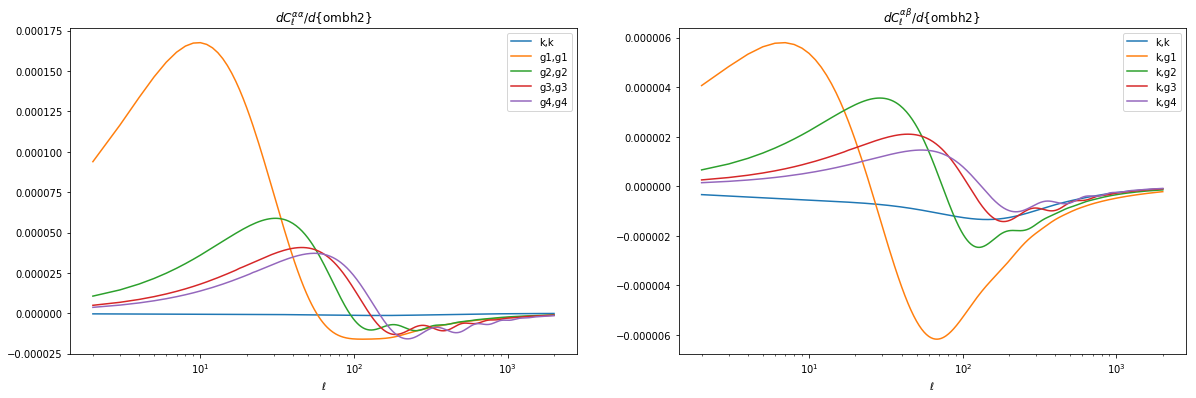

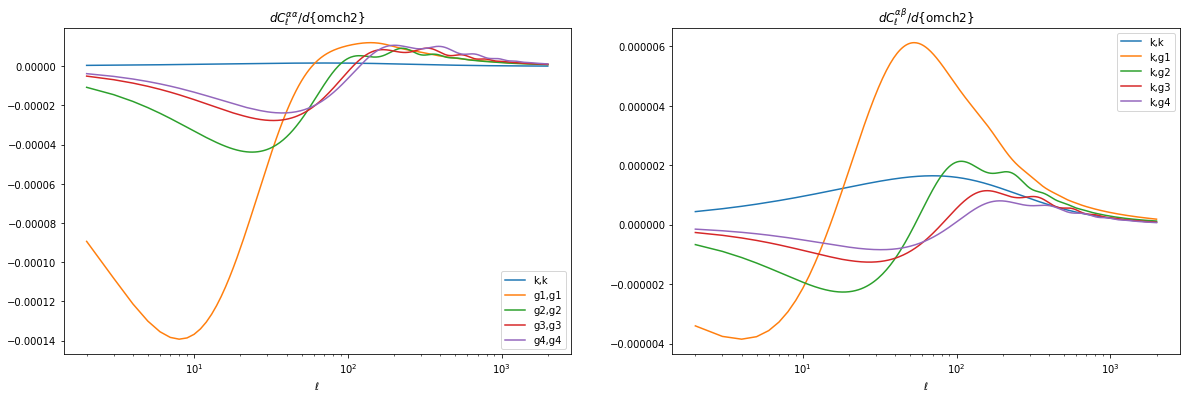

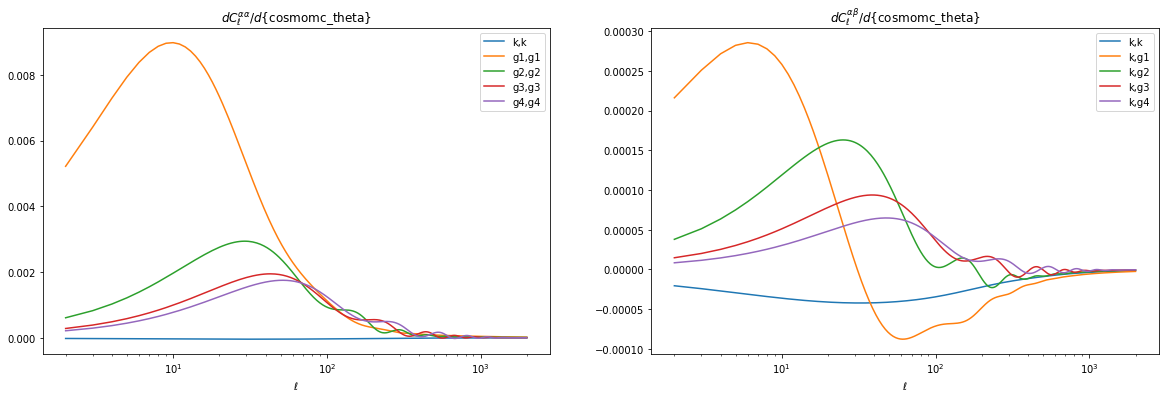

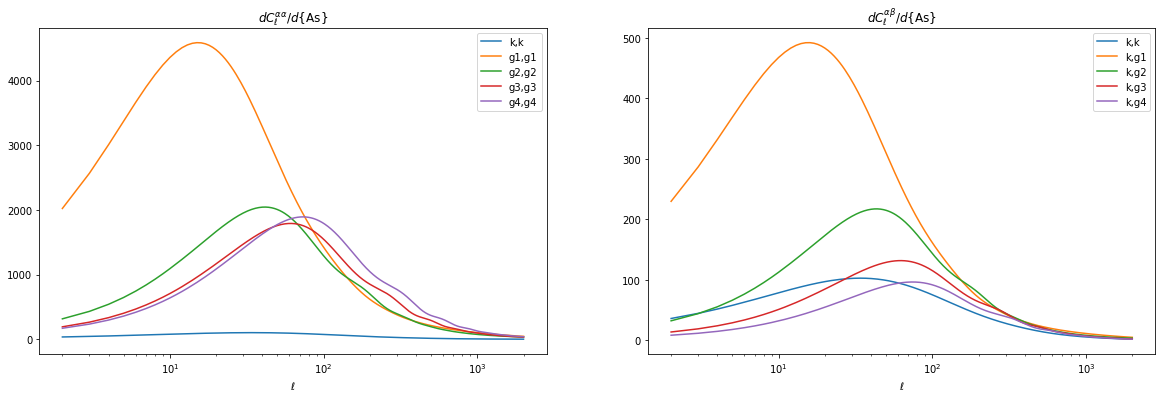

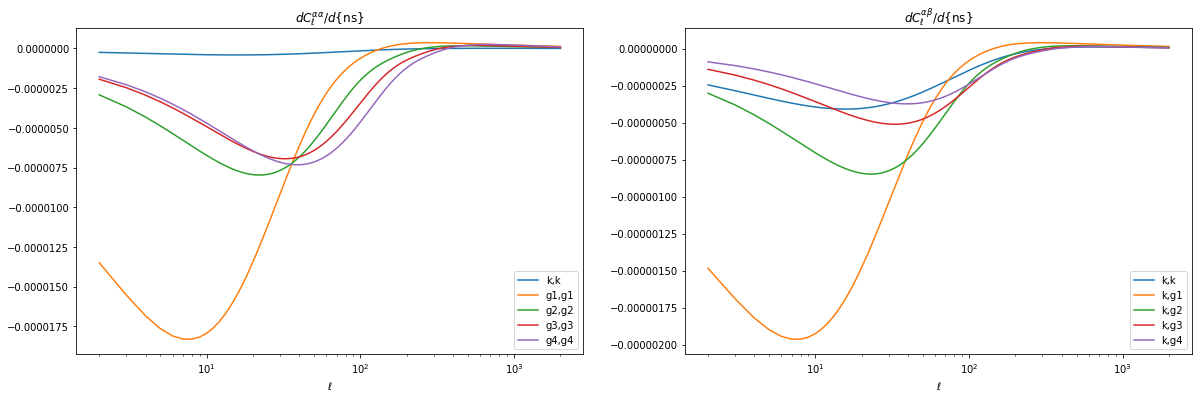

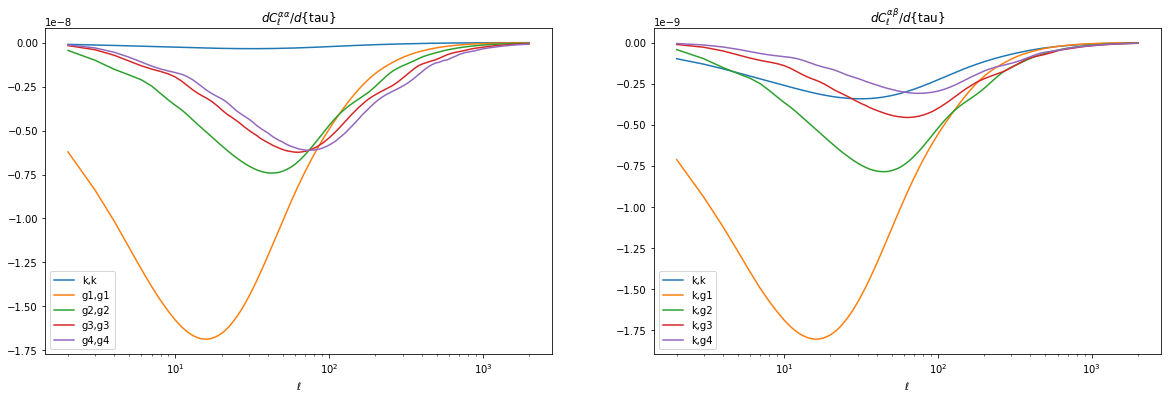

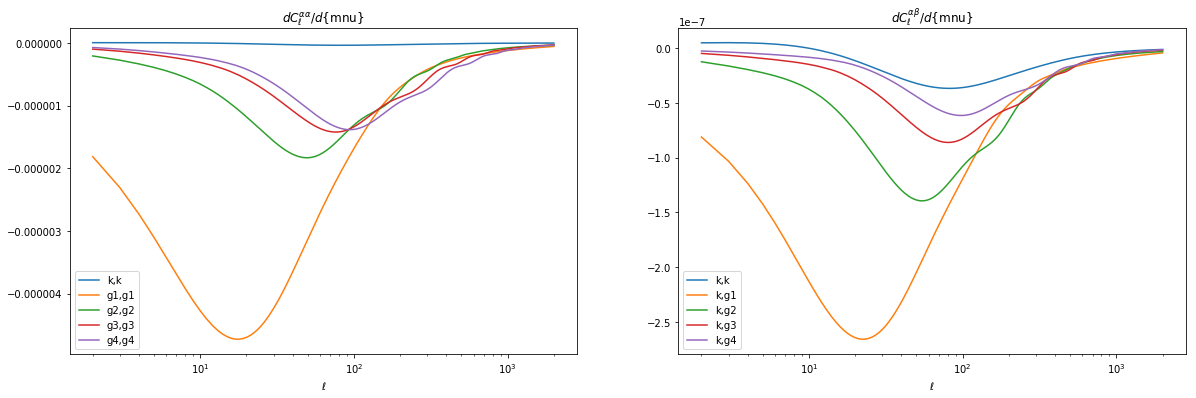

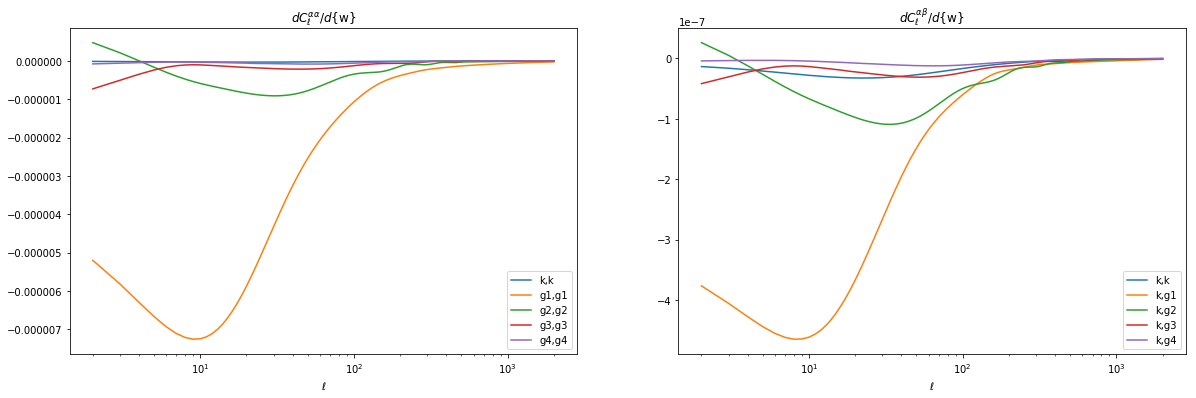

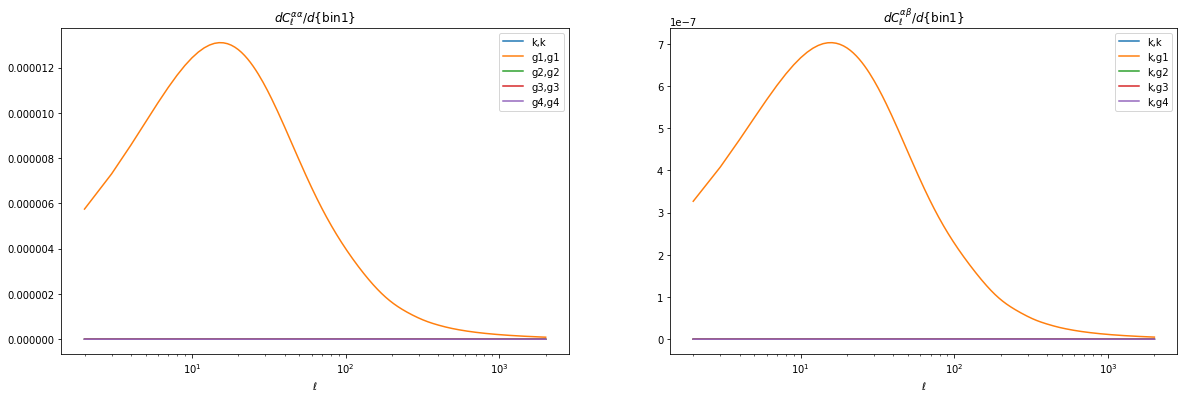

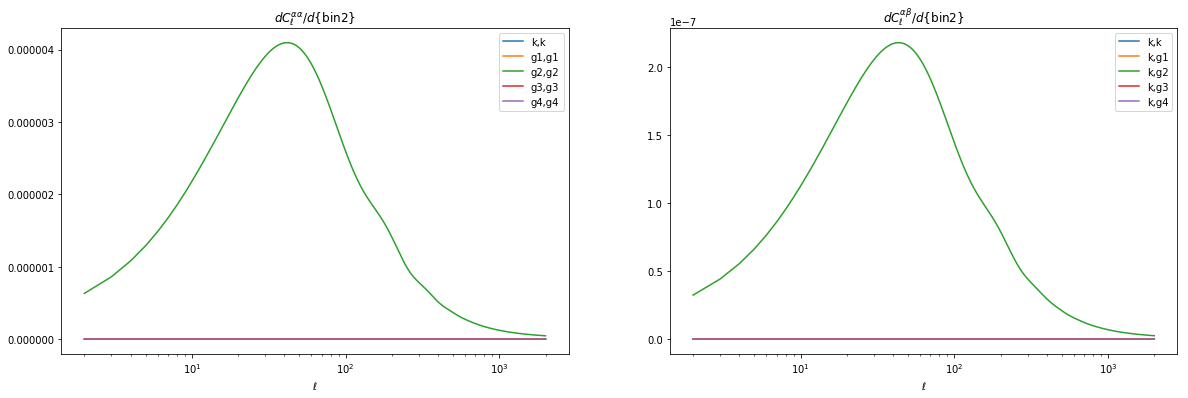

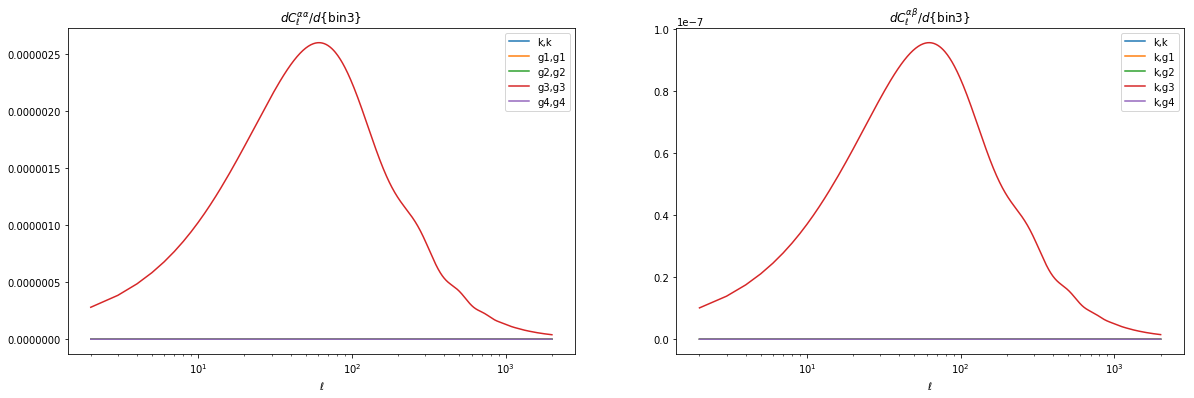

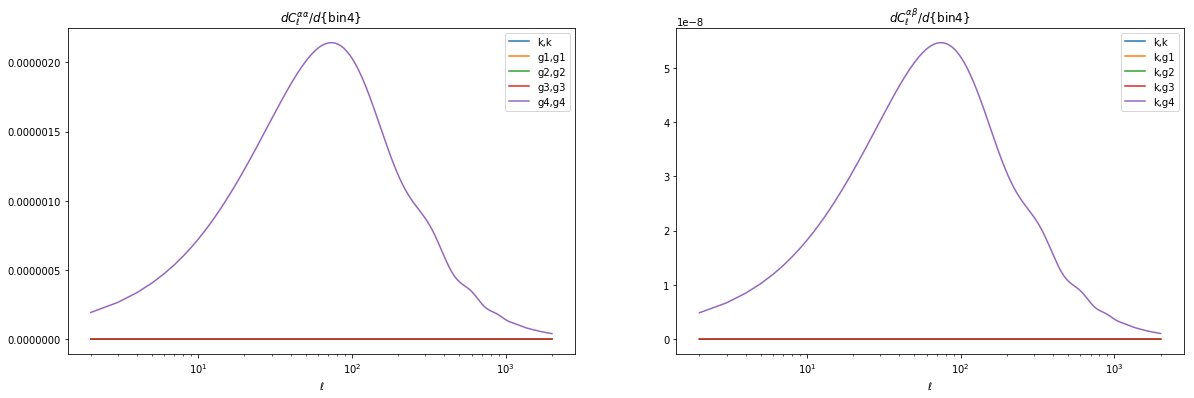

done


In [8]:
%matplotlib inline 
#qt
for paramNum in range(nParams):    
    #print paramNum
    #plt.figure()
    
    f, axarr = plt.subplots(1,2,figsize=(20,6))            
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]
                
                if obs1 == 0: # cross with kappa
                    plt.sca(axarr[1])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label=obsNames[ClNum])

                if obs1 == obs2: # auto power
                    plt.sca(axarr[0])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label=obsNames[ClNum])

    plt.sca(axarr[1])            
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[0])            
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()
    
print 'done'

In [9]:
# load some of Byeonghee's stuff
ByeDir = 'Byeonghee_dat/'
nThetas = 8
# prepare some empty lists to laod data into
dClg1g1 = []
dClkg1  = []
dClkk   = []
for thetaNum in range(nThetas):
    dClg1g1.append( np.loadtxt(ByeDir+'dclg1g1_theta{0}.dat'.format(thetaNum+1)) )
    dClkg1.append( np.loadtxt(ByeDir+'dclkg1_theta{0}.dat'.format(thetaNum+1)) )
    dClkk.append( np.loadtxt(ByeDir+'dclkk_theta{0}.dat'.format(thetaNum+1)) )
    
# new dw files
newDw = False #True
wIndex = 6
if newDw:
    dClg1g1[wIndex] = np.loadtxt(ByeDir+'dclg1g1_dw.dat')
    dClkg1[wIndex] = np.loadtxt(ByeDir+'dclkg1_dw.dat')
    dClkk[wIndex] = np.loadtxt(ByeDir+'dclkk_dw.dat')

print dClg1g1[0].shape
print dClkg1[0].shape
print dClkk[0].shape

bElls = np.arange(2000)+2
print bElls[0]

(2000,)
(2000,)
(2000,)
2


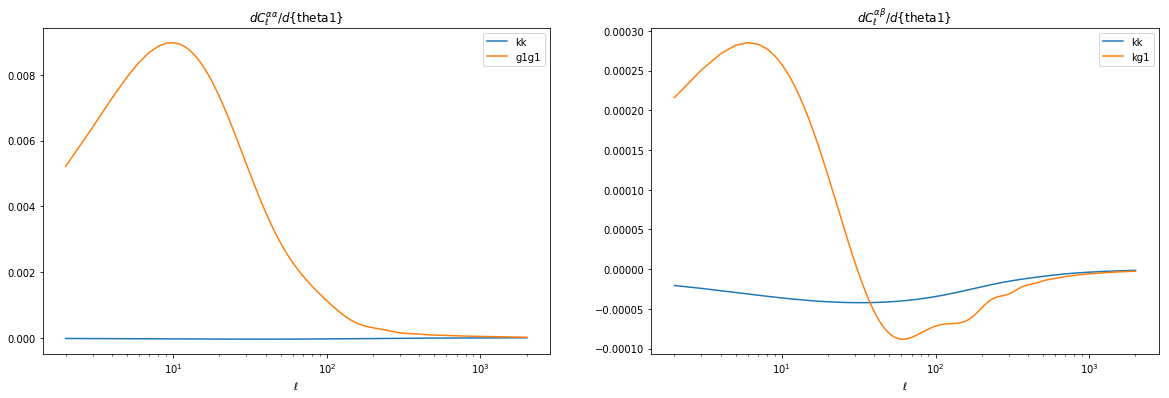

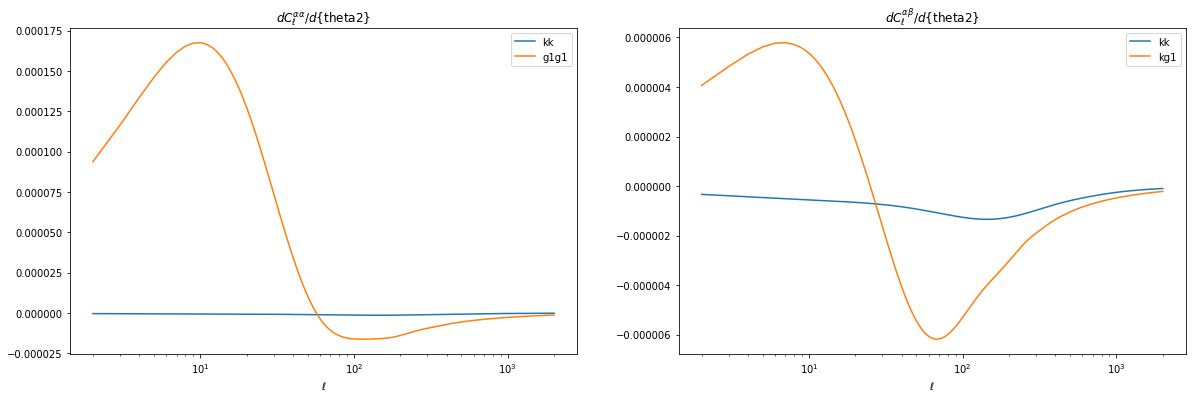

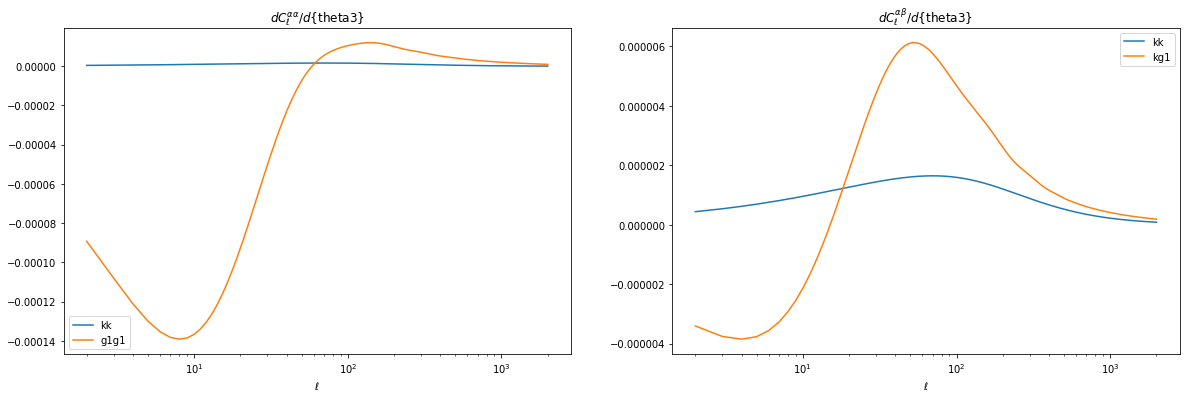

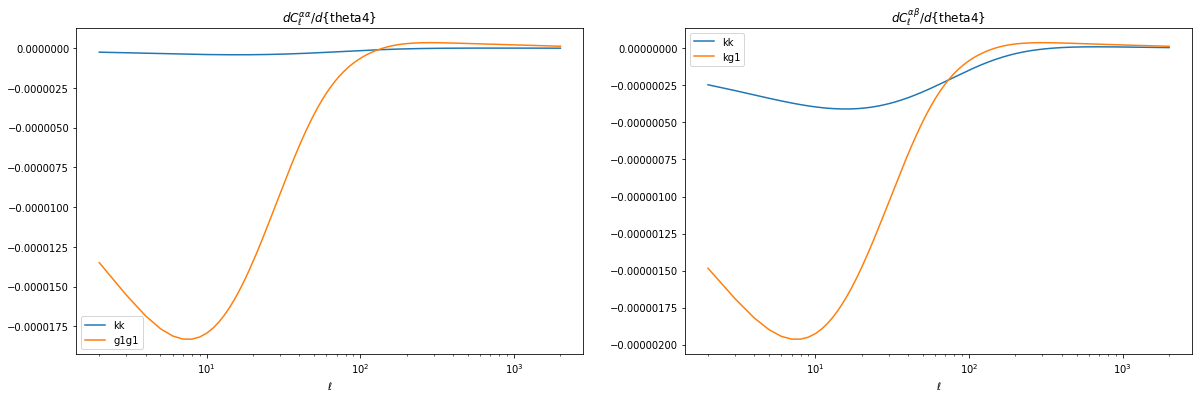

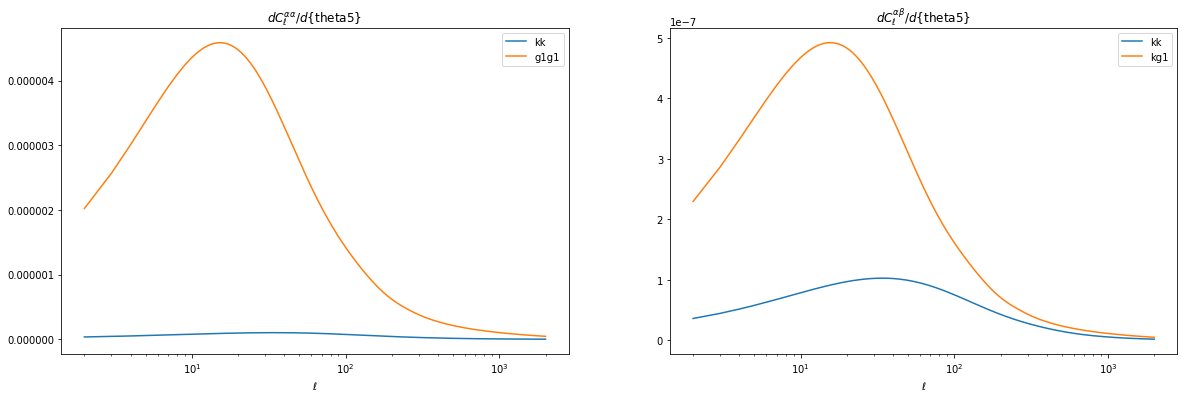

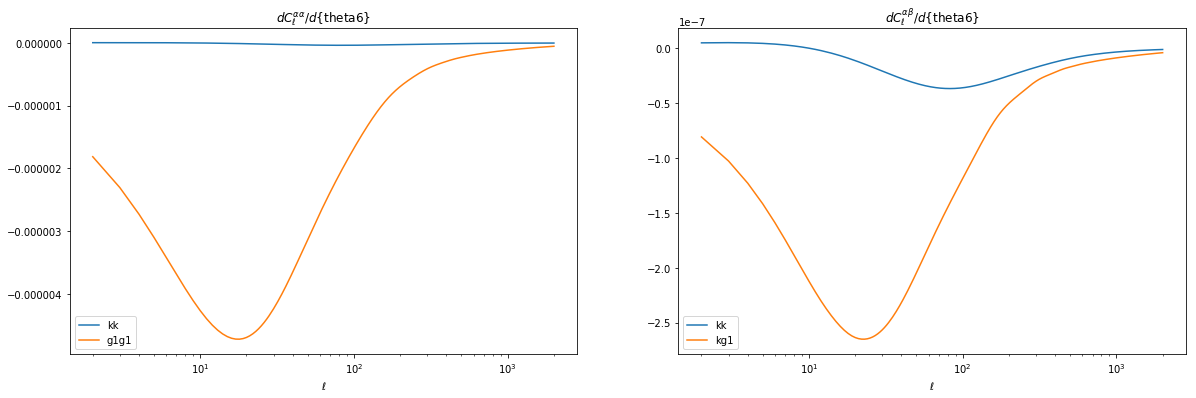

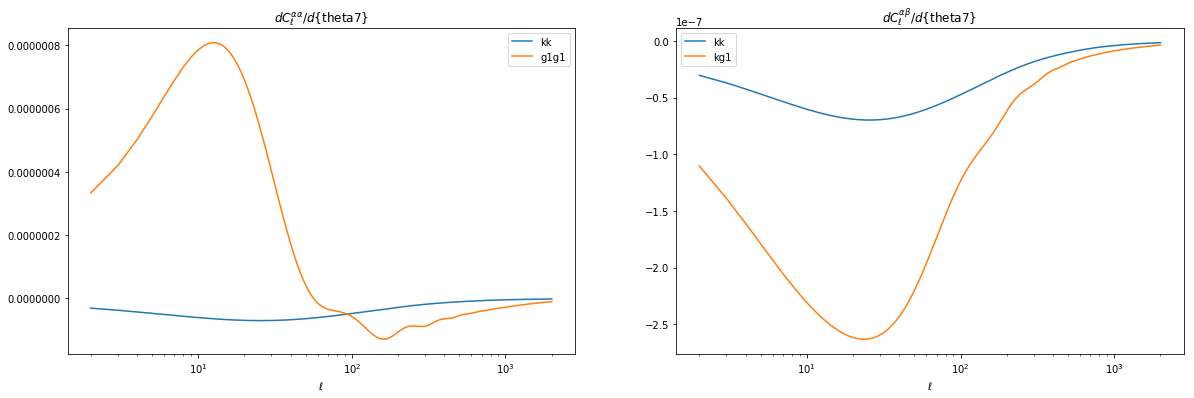

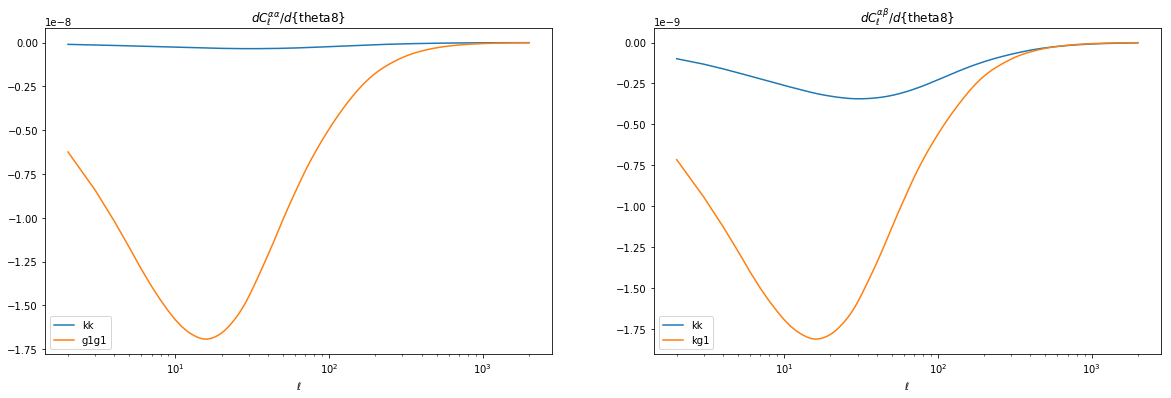

In [10]:
# plot them to make sure they look like I expect
%matplotlib inline
for thetaNum in range(nThetas):
    f, axarr = plt.subplots(1,2,figsize=(20,6)) 
    
    plt.sca(axarr[0])
    plt.semilogx(bElls,dClkk[thetaNum],label = 'kk')
    plt.semilogx(bElls,dClg1g1[thetaNum],label = 'g1g1')
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{theta{0}}}'.format(thetaNum+1))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[1])
    plt.semilogx(bElls,dClkk[thetaNum],label = 'kk')
    plt.semilogx(bElls,dClkg1[thetaNum],label = 'kg1')
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{theta{0}}}'.format(thetaNum+1))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()

In [11]:
# Dictionary to map my param numbers to Byeonghee's   (need to deal with 10^9 factor on As too)
ByeParams = ['cosmomc_theta','ombh2','omch2','ns','As','mnu','w','tau']
# my param numbers
print paramList
print ByeParams
ByeDict = {2:0,0:1,1:2,4:3,3:4,6:5,7:6,5:7}
for paramNum in range(8):
    print 'Zparam {0}, Bparam {1}'.format(paramList[paramNum],ByeParams[ByeDict[paramNum]])

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
['cosmomc_theta', 'ombh2', 'omch2', 'ns', 'As', 'mnu', 'w', 'tau']
Zparam ombh2, Bparam ombh2
Zparam omch2, Bparam omch2
Zparam cosmomc_theta, Bparam cosmomc_theta
Zparam As, Bparam As
Zparam ns, Bparam ns
Zparam tau, Bparam tau
Zparam mnu, Bparam mnu
Zparam w, Bparam w


In [12]:
# adjust scale on As values
dClg1g1[4] *=1e9
dClkg1[4]  *=1e9
dClkk[4]   *=1e9

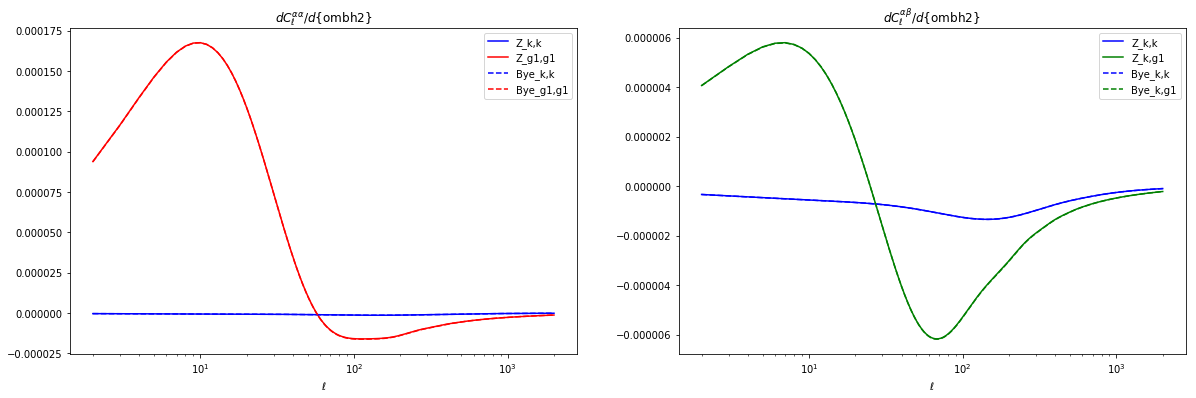

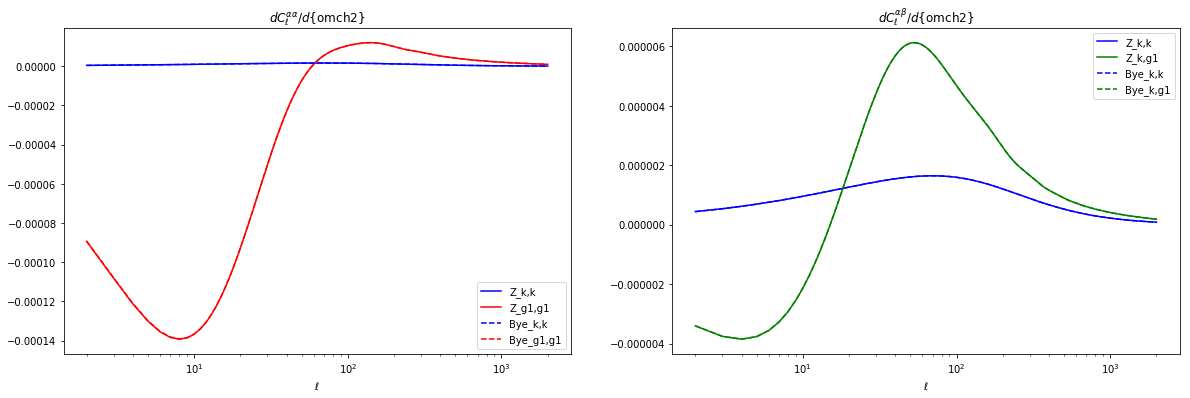

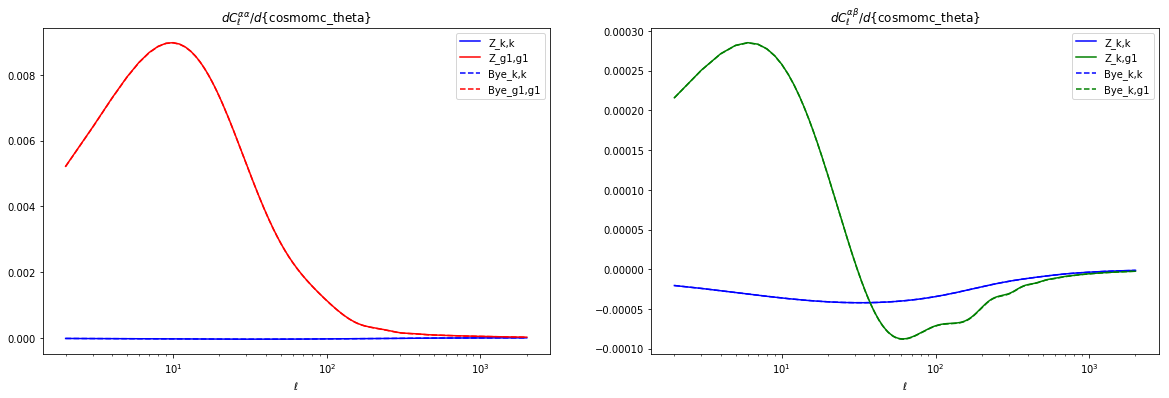

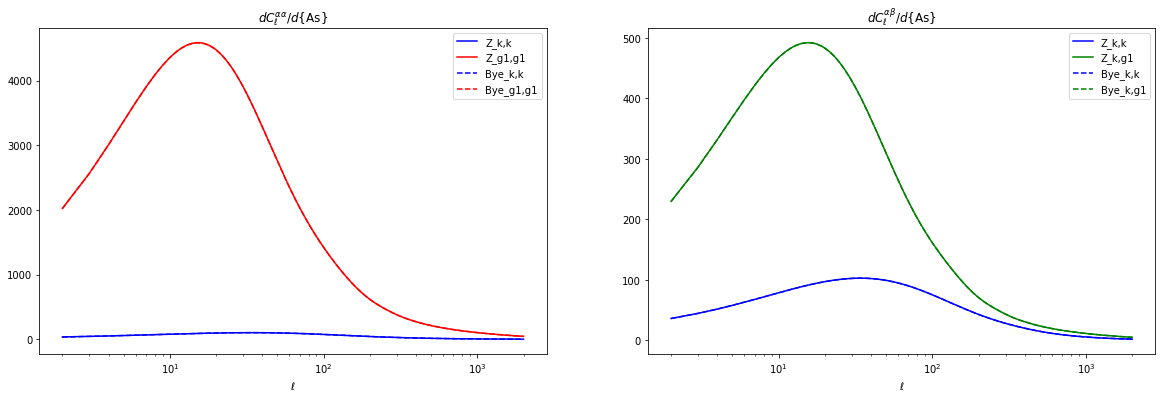

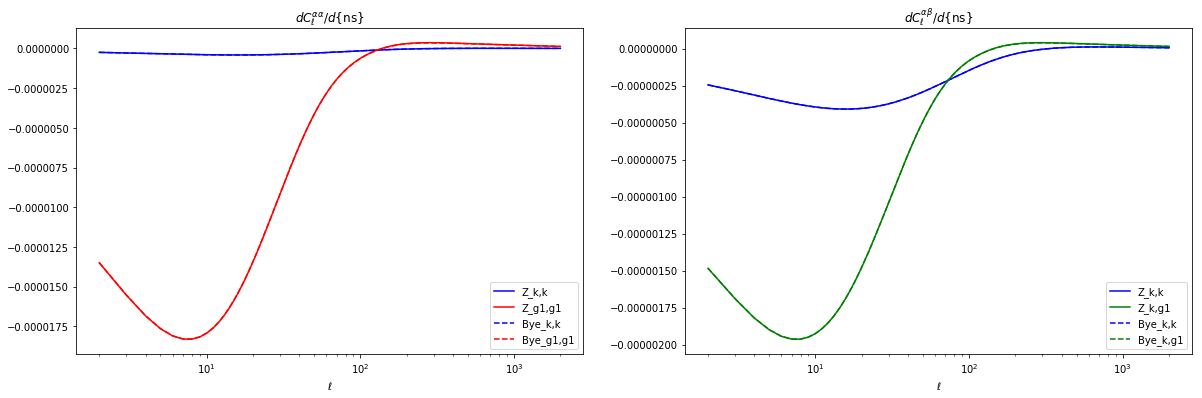

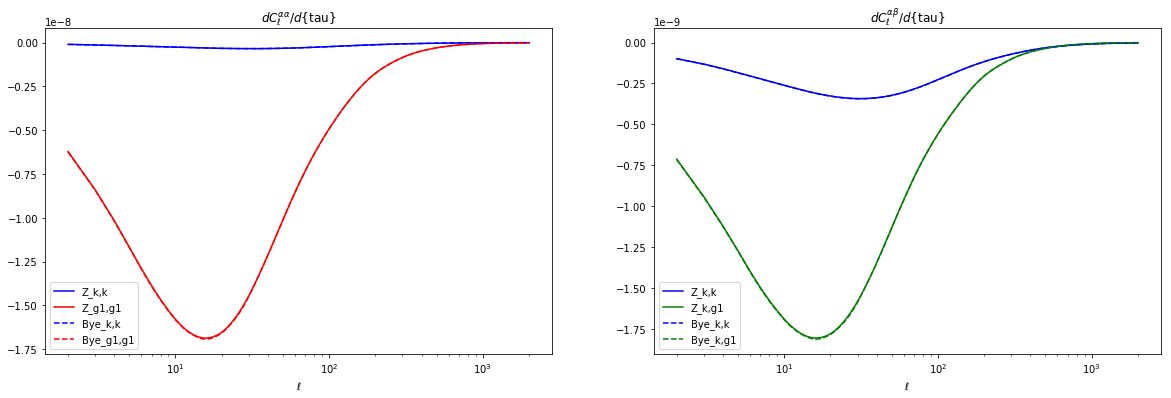

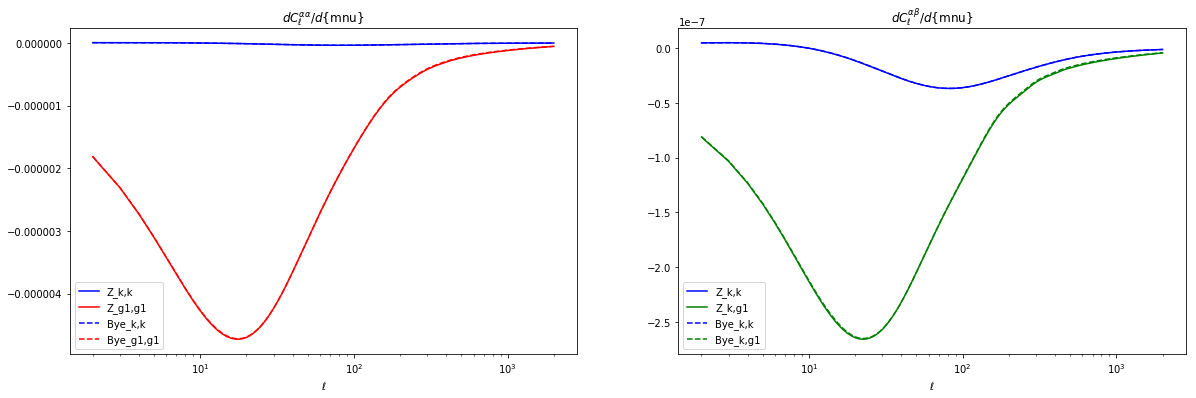

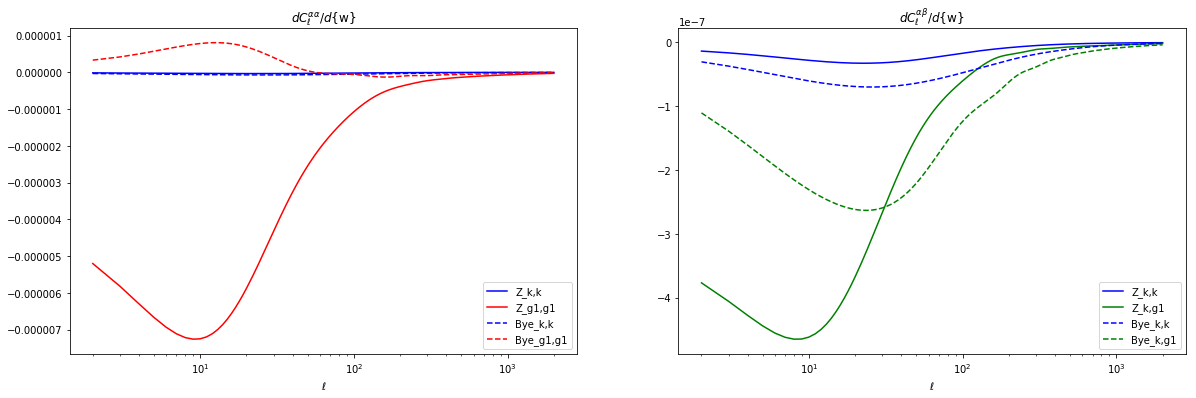

done


In [13]:
# make combined plot
#%matplotlib qt
colors = ['b','g','r','r','r','r']
nMaps = 5#2
obsToPlot = [0,1,5] # kk,kg1,g1g1
for paramNum in range(nCosParams):    
    f, axarr = plt.subplots(1,2,figsize=(20,6))            
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]
                
                if obs1 == 0 and ClNum in obsToPlot: # cross with kappa
                    plt.sca(axarr[1])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color=colors[ClNum])

                if obs1 == obs2 and ClNum in obsToPlot: # auto power
                    plt.sca(axarr[0])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color=colors[ClNum])

    plt.sca(axarr[1])            
    plt.semilogx(bElls,dClkk[ByeDict[paramNum]],label = 'Bye_k,k',linestyle='--',color=colors[0])
    plt.semilogx(bElls,dClkg1[ByeDict[paramNum]],label = 'Bye_k,g1',linestyle='--',color=colors[1])
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[0])            
    plt.semilogx(bElls,dClkk[ByeDict[paramNum]],label = 'Bye_k,k',linestyle='--',color=colors[0])
    plt.semilogx(bElls,dClg1g1[ByeDict[paramNum]],label = 'Bye_g1,g1',linestyle='--',color=colors[2])
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()
    
print 'done'

In [14]:
# read Byeonghee's Cls
useV1 = True#False
if useV1: # use version 1
    ByeDir = 'Byeonghee_dat/'
    #ByeDir = 'Byeonghee_dat4/'
    N = 4
    Y = np.loadtxt(ByeDir+'cl_kki.dat')
    cl_kki = Y[:,].reshape(N,-1)
    # This one is not plotted below; still ought to check it

    Y = np.loadtxt(ByeDir+'cl_kg.dat')
    cl_kg = Y[:,].reshape(N,-1)

    Y = np.loadtxt(ByeDir+'cl_gg.dat')
    cl_gg = Y[:,].reshape(N,-1)

    Y = np.loadtxt(ByeDir+'cl_kk.dat')
    cl_kk = Y
else: # use version 4
    ByeDir = 'Byeonghee_dat4/'
    N = 4
    Y = np.loadtxt(ByeDir+'cl_kki.dat')
    print Y.shape
    #cl_kki = Y[:,].reshape(N,-1)
    cl_kki = Y.T
    # This one is not plotted below; still ought to check it

    Y = np.loadtxt(ByeDir+'cl_kg.dat')
    print Y.shape
    #cl_kg = Y[:,].reshape(N,-1)
    cl_kg = Y.T

    Y = np.loadtxt(ByeDir+'cl_gg.dat')
    print Y.shape
    #cl_gg = Y[:,].reshape(N,-1)
    cl_gg = Y.T

    Y = np.loadtxt(ByeDir+'cl_kk.dat')
    print Y.shape
    cl_kk = Y
    
print cl_kki.shape,cl_kg.shape,cl_gg.shape,cl_kk.shape

(4, 2000) (4, 2000) (4, 2000) (2000,)


(5, 5, 1999)
5


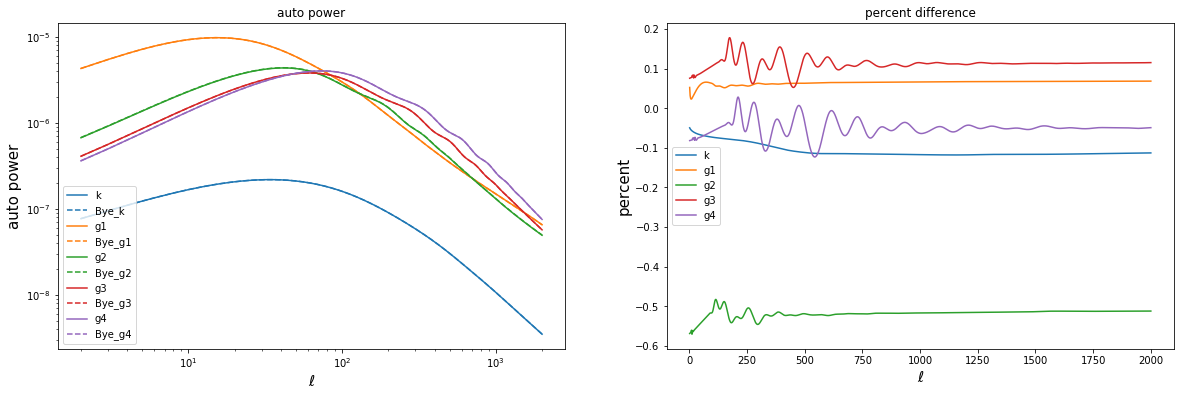

In [15]:
# plot auto power spectra
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['k','g1','g2','g3','g4']
bEllsMax = ells.size
for mapNum in range(nMaps):
    ZcrossCls = Fobj.crossCls[mapNum,mapNum]
    #BcrossCls =      crossClsB[mapNum,mapNum]
    #"""
    if mapNum == 0:
        BcrossCls = cl_kk
    else:
        BcrossCls = cl_gg[mapNum-1]
    #"""
    
    plt.sca(axarr[0])
    plt.loglog(ells,ZcrossCls,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.loglog(bElls,BcrossCls,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(ZcrossCls-BcrossCls[:bEllsMax])*100/ZcrossCls,color='C{0}'.format(mapNum),label=labels[mapNum])
    
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('auto power',fontsize=15)
plt.title('auto power')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

(5, 5, 1999)
5


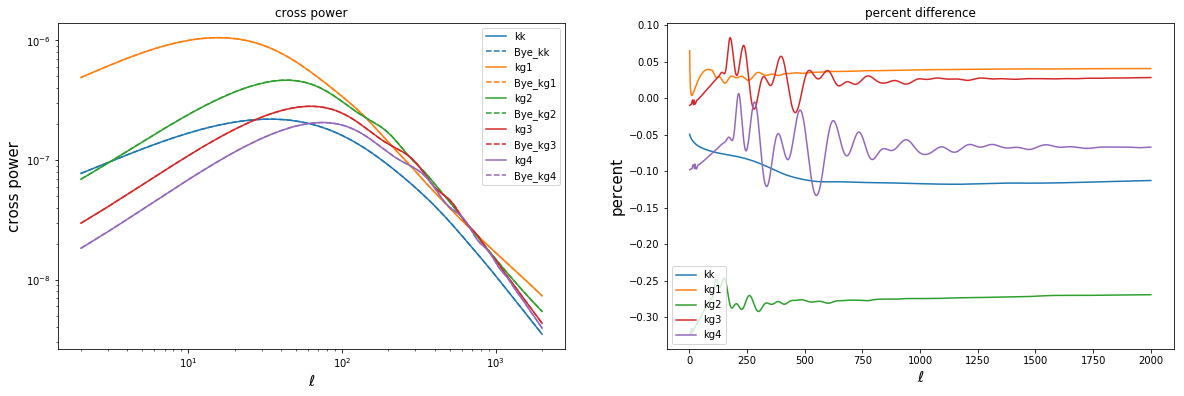

In [16]:
# plot kappa cross galaxy spectra
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['kk','kg1','kg2','kg3','kg4']
bEllsMax = ells.size
for mapNum in range(nMaps):
    ZcrossCls = Fobj.crossCls[0,mapNum]
    #BcrossCls =     crossClsB[0,mapNum]
    #"""
    if mapNum == 0:
        BcrossCls = cl_kk
    else:
        BcrossCls = cl_kg[mapNum-1]
    #"""    
        
    plt.sca(axarr[0])
    plt.loglog(ells,ZcrossCls,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.loglog(bElls,BcrossCls,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(ZcrossCls-BcrossCls[:bEllsMax])*100/ZcrossCls,color='C{0}'.format(mapNum),label=labels[mapNum])
    
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('cross power',fontsize=15)
plt.title('cross power')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

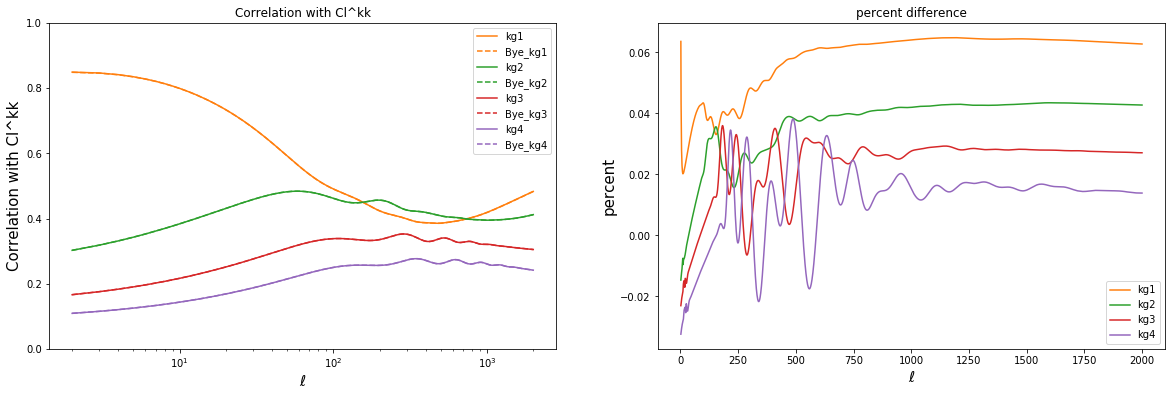

In [17]:
#plot correlation coefficients
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
labels = ['kk','kg1','kg2','kg3','kg4']
bEllsMax = ells.size
for mapNum in range(1,nMaps):
    Clkg = Fobj.crossCls[0,mapNum]
    Clkk = Fobj.crossCls[0,0]
    Clgg = Fobj.crossCls[mapNum,mapNum]
    r = Clkg/np.sqrt(Clkk*Clgg)
    Br = cl_kg[mapNum-1]/np.sqrt(cl_kk*cl_gg[mapNum-1])
             
    plt.sca(axarr[0])
    plt.semilogx(ells,r,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.semilogx(bElls,Br,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(r-Br[:bEllsMax])*100/r,color='C{0}'.format(mapNum),label=labels[mapNum])
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('Correlation with Cl^kk',fontsize=15)
plt.ylim([0,1])
plt.title('Correlation with Cl^kk')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

# look at P(z,k) at agreed upon z and cosparams

(200, 6)
9.999999999999991e-05 100.00000000000004


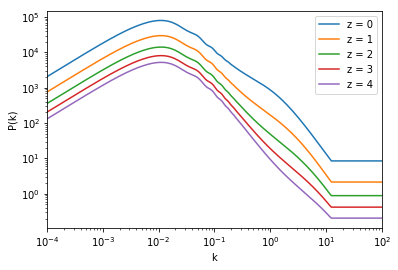

In [18]:
# look at P(z,k) at agreed upon z and cosparams

# set cosmological parameters
cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,
    
        'w'     : -1,

        # if fiducial mnu is changed, need to adjust omch2 as well
        'mnu'   : 0.06, # (eV)
        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1,
        'neutrino_hierarchy'      : 'normal'}

# load Byeonghee's P(k) file
BPk = np.loadtxt('Byeonghee_dat/Pk.dat')
print BPk.shape
print BPk[0,0],BPk[-1,0]

#%matplotlib notebook
plt.loglog(BPk[:,0],BPk[:,1],label='z = 0')
plt.loglog(BPk[:,0],BPk[:,2],label='z = 1')
plt.loglog(BPk[:,0],BPk[:,3],label='z = 2')
plt.loglog(BPk[:,0],BPk[:,4],label='z = 3')
plt.loglog(BPk[:,0],BPk[:,5],label='z = 4')
plt.xlabel('k')
plt.xlim([1.e-4,1.e+2])
plt.ylabel('P(k)')
plt.legend()
plt.show()

In [19]:
import crosspower as cp
myPk = cp.MatterPower(**cosParams)
print 'done'

neutrino_hierarchy =  normal
zs.size:  9998
done


In [20]:
kRange = BPk[:,0]
P0 = myPk.PK.P(0,kRange)
P1 = myPk.PK.P(1,kRange)
P2 = myPk.PK.P(2,kRange)
P3 = myPk.PK.P(3,kRange)
P4 = myPk.PK.P(4,kRange)

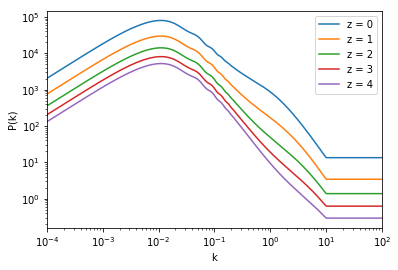

In [21]:
#%matplotlib notebook
plt.loglog(kRange,P0,label='z = 0')
plt.loglog(kRange,P1,label='z = 1')
plt.loglog(kRange,P2,label='z = 2')
plt.loglog(kRange,P3,label='z = 3')
plt.loglog(kRange,P4,label='z = 4')
plt.xlabel('k')
plt.xlim([1.e-4,1.e+2])
plt.ylabel('P(k)')
plt.legend()
plt.show()

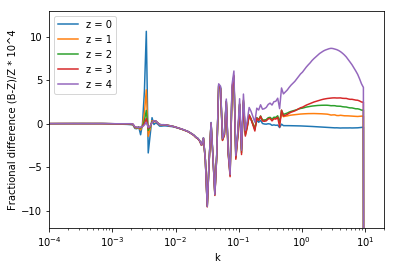

In [22]:
# fractional differences
#%matplotlib notebook
plt.semilogx(BPk[:,0],(BPk[:,1]-P0)/P0*1e4,label='z = 0')
plt.semilogx(BPk[:,0],(BPk[:,2]-P1)/P1*1e4,label='z = 1')
plt.semilogx(BPk[:,0],(BPk[:,3]-P2)/P2*1e4,label='z = 2')
plt.semilogx(BPk[:,0],(BPk[:,4]-P3)/P3*1e4,label='z = 3')
plt.semilogx(BPk[:,0],(BPk[:,5]-P4)/P4*1e4,label='z = 4')
plt.xlabel('k')
plt.ylabel('Fractional difference (B-Z)/Z * 10^4')
plt.xlim([1e-4,2e1])
plt.ylim([-12,13])
plt.legend()
plt.show()

# check derivatives of P(k)

In [23]:
# load Byeonghee's dP(k)/dmnu files
dPkdMnu_Lin = np.loadtxt('Byeonghee_dat3/dlnP_dmnu_linear.dat')
dPkdMnu_NLn = np.loadtxt('Byeonghee_dat3/dlnP_dmnu_nonlinear.dat')
print dPkdMnu_Lin.shape
print dPkdMnu_NLn.shape

(1000, 5)
(1000, 5)


# the rest of this comparison is done in notebook: 
Troubleshooting Cl(mnu) and P(mnu)

# Load covariance matrix for comparison

In [24]:
# load some of Byeonghee's stuff
ByeDir = 'Byeonghee_dat3/'

Y = np.loadtxt(ByeDir+'covariance_matrix_linear.dat')
CovLin = (Y.T).reshape(2000, 15, 15)
Y = np.loadtxt(ByeDir+'covariance_matrix_nonlinear.dat')
CovNLn = (Y.T).reshape(2000, 15, 15)

# note from Byeonghee:
#ellmin = 2. Order: <kk kk> <kk kg1> ... <kk kg4> <kk g1g1> ... <kk g4g4> <kk g1g2> ... <kk g3g4>
print CovLin.shape
print CovNLn.shape

# transpose function reverses the dimensions of the array
covLinT = np.array(CovLin).transpose()
covNLnT = np.array(CovNLn).transpose()
print covLinT.shape
print covNLnT.shape


(2000, 15, 15)
(2000, 15, 15)
(15, 15, 2000)
(15, 15, 2000)


In [25]:
# The ordering he specified looks like it is across the first row or column.
# To make this ordered like my covariance matrix, I need to rearrange:
#    Fobj.obsNames: ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 
#                    'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 
#                    'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']
# Q: what numpy function swaps rows/columns?
# A: 
# Q: what to swap? (zero based indices)
# A: Write out all of his without ellipsis:
#     <kk kk> <kk kg1> <kk kg2> <kk kg3> <kk kg4> 
#     <kk g1g1> <kk g2g2> <kk g3g3> <kk g4g4> 
#     <kk g1g2> <kk g1g3> <kk g1g4> <kk g2g3> <kk g2g4> <kk g3g4>
#    So swap 6,9;  # ok no, i need to specify which matrix is first, which is second; and order of swapping.
#    So starting with B's ordering, swap:
#      6,9;  7,10;  8,11;  10,12;  11,13;  13,14
#
# actually, use permutation via list comprehension
# define permutator:
#perm = [0,1,2,3,4,5, 9,12,14, 6,7,8, 10,11, 13]
# That one went Z->B.
# Define B->Z permutator:
perm = [0,1,2,3,4,5, 9,10,11, 6,12,13, 7,14, 8]


In [26]:
# define array permutating function

def arrayPermute(myArray,perm):
    """
    Purpose:
        Permute the ordering of the rows and columns of a square array. 
        Permutation will be done on the first two axes of input array.
    Inputs:
        myArray: an nxn square numpy array, possibly with more than 2 dimensions.
        perm: an n-length array, contaning a permutation of the numbers 0 to n-1
    Returns:
        A permutted numpy array of the same size and shape as input myArray
    """
    # get transpose permutator
    axesT = np.arange(myArray.shape.__len__())
    axesT[0],axesT[1] = axesT[1],axesT[0]
    #print axesT
    
    tempArray = np.array([myArray[p] for p in perm])
    tempArrayT = tempArray.transpose(axesT)  # switches axes 0,1 -> 1,0
    returnArrayT = np.array([tempArrayT[p] for p in perm])
    returnArray = returnArrayT.transpose(axesT)
    return returnArray


In [27]:
# test 1/2 for array permutation
testPerm = False

if testPerm:
    t = np.arange(25).reshape(5,5)
    print t
    testPerm = [0,1,4,3,2]
    e = arrayPermute(t,testPerm)
    print e

In [28]:
# test 2/2 for array permutation

if testPerm:
    t = np.arange(50).reshape(5,5,2)
    print t.T
    testPerm = [0,1,4,3,2]
    e = arrayPermute(t,testPerm)
    print e.T

In [29]:
covLinTP = arrayPermute(covLinT,perm)
covNLnTP = arrayPermute(covNLnT,perm)
print covLinTP.shape
print covNLnTP.shape

(15, 15, 2000)
(15, 15, 2000)


In [30]:
# load a linear and a nonlinear Fobj for comparison
import FisherCl as fcl
import crosspower as cp
import pickle
filehandlerNLn = open('Fisher_4_4U.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master
filehandlerLin = open('Fisher_4_4T.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master

#filehandlerLin = open('Fisher_4_4Q.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, from FisherCl branch master
#filehandlerNLn = open('Fisher_4_4P.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, from FisherCl branch master

FobjLin = pickle.load(filehandlerLin) 
FobjNLn = pickle.load(filehandlerNLn) 

"""
lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList
"""

print FobjLin.obsList
print FobjLin.obsNames
print FobjLin.paramList
print ''
print FobjNLn.obsList
print FobjNLn.obsNames
print FobjNLn.paramList
print ''
print FobjLin.lmin,FobjLin.lmax
print FobjNLn.lmin,FobjNLn.lmax
print ''
print FobjLin.nonlinear
print FobjNLn.nonlinear

[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 12. 13. 14. 18. 19. 24.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']

[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 12. 13. 14. 18. 19. 24.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']

2 1000
2 1000

False
True


In [31]:
# check the sigmas for these stored FisherMatrix objects
# this does not take lmin= 50 into account.
print 'Linear:'
paramList = FobjLin.paramList
sigmasLin = FobjLin.getSigmas()
for i, param in enumerate(paramList):
    print param, ': ',sigmasLin[i]
    
# this does not take lmin= 50 into account.
print '\nNonlinear:'
paramList = FobjNLn.paramList
sigmasNLn = FobjNLn.getSigmas()
for i, param in enumerate(paramList):
    print param, ': ',sigmasNLn[i]

Linear:
ombh2 :  0.0015568868715715258
omch2 :  0.004608747241613786
cosmomc_theta :  6.78207702990133e-05
As :  6.037531755484968e-11
ns :  0.007881619559370502
tau :  0.1767373030125388
mnu :  0.0462725575425127
w :  0.024485289708133417
bin1 :  0.005956880432745242
bin2 :  0.007556891533773195
bin3 :  0.009234162396828954
bin4 :  0.010433926264134918

Nonlinear:
ombh2 :  0.0011563072807071661
omch2 :  0.003080450496938807
cosmomc_theta :  4.379134052273493e-05
As :  4.413077015103927e-11
ns :  0.006172567991019278
tau :  0.21191128849128912
mnu :  0.01740451538750948
w :  0.02333335507226615
bin1 :  0.005230799039401502
bin2 :  0.003862432977379844
bin3 :  0.005461915433030939
bin4 :  0.006743395597623252


In [32]:
# multiply fsky factor
fsky =  0.5
print 'fsky =',fsky
print 'fsky^(-1/2) =',1/np.sqrt(fsky)
#Fij2 *= fsky
#sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

fsky = 0.5
fsky^(-1/2) = 1.414213562373095


In [33]:
# replace those with ones that do include lmin=50
lmin = 50
lmax = 1000

verbose = False
FijLin = FobjLin.makeFisher(lmin,lmax,verbose=verbose)
FijNLn = FobjNLn.makeFisher(lmin,lmax,verbose=verbose)

# apply fsky
FijLin *= fsky
FijNLn *= fsky

# get sigmas
sigmasLin = np.sqrt(np.diag(np.linalg.inv(FijLin)))
sigmasNLn = np.sqrt(np.diag(np.linalg.inv(FijNLn)))


AttributeError: FisherMatrix instance has no attribute 'lminP'

In [ ]:
# extract covariance matrices from Fobjects and insert B's matrices
covarLin = FobjLin.covar
covarNLn = FobjNLn.covar
print covarLin.shape
print covarNLn.shape
invCovLin = FobjLin.invCov
invCovNLn = FobjNLn.invCov
print invCovLin.shape
print invCovNLn.shape

# re-define these for the truncation
lmax = 1000
lmin = 2

# truncate B's covar to fit
covLinTPtrunc = covLinTP[:,:,:lmax-lmin+1]
covNLnTPtrunc = covNLnTP[:,:,:lmax-lmin+1]
print covLinTPtrunc.shape
print covNLnTPtrunc.shape

# invert
print 'inverting . . . '
invCovLin_B = np.transpose(np.linalg.inv(np.transpose(covLinTPtrunc)))
invCovNLn_B = np.transpose(np.linalg.inv(np.transpose(covNLnTPtrunc)))
print invCovLin_B.shape
print invCovNLn_B.shape

# insert
FobjLin.covar = covLinTPtrunc
FobjNLn.covar = covNLnTPtrunc
FobjLin.invCov = invCovLin_B
FobjNLn.invCov = invCovNLn_B

print 'done.'

In [ ]:
# re-make Fisher matrices and sigmas with inserted invCov
lmin = 50
lmax = 1000

verbose = False
FijLin_B = FobjLin.makeFisher(lmin,lmax,verbose=verbose)
FijNLn_B = FobjNLn.makeFisher(lmin,lmax,verbose=verbose)

# apply fsky
FijLin_B *= fsky
FijNLn_B *= fsky

# get sigmas
sigmasLin_B = np.sqrt(np.diag(np.linalg.inv(FijLin_B)))
sigmasNLn_B = np.sqrt(np.diag(np.linalg.inv(FijNLn_B)))


In [ ]:
# check the sigmas against those stored FisherMatrix objects
print 'Linear:'
for i, param in enumerate(paramList):
    print param, ': ',sigmasLin[i], ", ",sigmasLin_B[i]
    
print '\nNonlinear:'
for i, param in enumerate(paramList):
    print param, ': ',sigmasNLn[i], ", ",sigmasNLn_B[i]

In [ ]:
# convert to sigma(b)/b
#doSigBoverB = True
doSigBoverB = False

if doSigBoverB:
    binBs = FobjNLn.binBs
    print binBs

    sigmasNLn[-4:]/=binBs
    print sigmasNLn
    sigmasNLn_B[-4:]/=binBs
    print sigmasNLn_B


In [ ]:
# excise w, tau and remake sigmasNLn, sigmasNLn_B
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

if True:
    # remove tau: row,column = 5
    toDelete = 5
    paramList2 = np.delete(paramList,toDelete)
    FijNLn2 = fixParam(FijNLn,toDelete)
    FijNLn_B2 = fixParam(FijNLn_B,toDelete)
    # remove w: row,column = 6 (after deleting tau)
    toDelete = 6
    paramList3 = np.delete(paramList2,toDelete)
    FijNLn3 = fixParam(FijNLn2,toDelete)
    FijNLn_B3 = fixParam(FijNLn_B2,toDelete)
    
    sigmasNLn3 = np.sqrt(np.diag(np.linalg.inv(FijNLn3)))
    sigmasNLn_B3 = np.sqrt(np.diag(np.linalg.inv(FijNLn_B3)))
    print paramList3

In [ ]:
# convert to sigma(b)/b

if doSigBoverB:
    binBs = FobjNLn.binBs
    print binBs

    sigmasNLn3[-4:]/=binBs
    print sigmasNLn3
    sigmasNLn_B3[-4:]/=binBs
    print sigmasNLn_B3


In [ ]:
# Byeonghee's results using nonlinear power spectra
"""sigma(b)/b (4 bins) =  [ 0.0063022   0.00560226  0.00540911  0.00466538]
sigma(cosmomc_theta) =  7.58276477127e-05
sigma(\Omega_bh^2) =  0.00206850078114
sigma(\Omega_ch^2) =  0.00624934014317
sigma(n_s) =  0.0190489068958
sigma(10^9A_s) =  0.129011144081
sigma(m_{nu}) =  0.11056107791
sigma(w) =  0.0411035064527
sigma(tau) =  8.25658593413"""
sigmasB4 = {
    'cosmomc_theta' : 7.58276477127e-05,
    'ombh2' : 0.00206850078114,
    'omch2' : 0.00624934014317,
    'ns' : 0.0190489068958,
    'As' : 0.129011144081e-9,
    'mnu' : 0.11056107791,
    'w' : 0.0411035064527,
    'tau' : 8.25658593413,
    'bin1' : 0.0063022,
    'bin2' : 0.00560226,
    'bin3' : 0.00540911,
    'bin4' : 0.00466538
}
"""Now do the one that has had w and tau removed
sigma(b) (4 bins) =  [ 0.00553446  0.00386324  0.00346112  0.0028168 ]
sigma(cosmomc_theta) =  5.3458847331e-05
sigma(\Omega_bh^2) =  0.00164438257858
sigma(\Omega_ch^2) =  0.00435030886836
sigma(n_s) =  0.00865043065069
sigma(10^9A_s) =  0.0723781128272
sigma(m_{nu}) =  0.0667167394008
"""
sigmasB5_no_w_tau = {
    'cosmomc_theta' : 5.3458847331e-05,
    'ombh2' : 0.00164438257858,
    'omch2' : 0.00435030886836,
    'ns' : 0.00865043065069,
    'As' : 0.0723781128272e-9,
    'mnu' : 0.0667167394008,
    'bin1' : 0.00553446,
    'bin2' : 0.00386324,
    'bin3' : 0.00346112,
    'bin4' : 0.0028168
}

sigmasB = sigmasB4
#sigmasB = sigmasB5_no_w_tau


In [ ]:
print 'comparison of my results with those derived using B\'s covariance matrix'

from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_ZB(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn[i]
    Bi = sigmasNLn_B[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_ZB(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn_B[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


In [ ]:
# now without tau, w
sigmasB = sigmasB5_no_w_tau
paramList = paramList3

print 'comparison of my results with those derived using B\'s covariance matrix'


from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn3[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_ZB(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn3[i]
    Bi = sigmasNLn_B3[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_ZB(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn_B3[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


# Load B's Fisher Matrix to have control over which parameters are fixed

In [ ]:
# load some of Byeonghee's stuff
ByeDir = 'Byeonghee_dat3/'

Fij_B = np.loadtxt(ByeDir+'Fisher_12params.dat')
#Fij_B = (Y.T).reshape(12, 12)
#print Fij_B-Fij_B.transpose()

# message from B: 
# The parameters are ordered in this way: [b1, b2, b3, b4, cosmomc_theta, ombh2, omch2, ns, As, mnu, w, tau]
# my ordering:
paramList = FobjNLn.paramList
print paramList

In [ ]:
# just chop off the first 4 parameters, since they are the biases
# fixParam defined above.  In this case, I don't need it.
Fij_B2 = Fij_B[4:,4:]
print Fij_B2.shape

In [ ]:
# get sigmas and define permutor to compare to my results
sigmas_B_nob = np.sqrt(np.diag(np.linalg.inv(Fij_B2)))
B_nob_perm = [1,2,0,4,3,7,5,6]

In [ ]:
# cut bins from my Fij
paramList4 = paramList[:-4]
FijNLn_nob = FijNLn[:-4,:-4]
print paramList4
print FijNLn_nob.shape
paramListB = ['cosmomc_theta', 'ombh2', 'omch2', 'ns', 'As', 'mnu', 'w', 'tau']
print [paramListB[p] for p in B_nob_perm]

In [ ]:
# sigmas
sigmas_NLn_nob = np.sqrt(np.diag(np.linalg.inv(FijNLn_nob)))
sigmas_NLn_nob_B = np.sqrt(np.diag(np.linalg.inv(Fij_B2)))
# B's sigma for A_s seems to be scaled
sigmas_NLn_nob_B[4] *= 1e-9

In [ ]:

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList4):
    Zi = sigmas_NLn_nob[i]
    Bi = sigmas_NLn_nob_B[B_nob_perm[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


In [ ]:
print ByeParams
print paramListB
print paramList4

In [ ]:
# again, without Tau, w
#  and also without Tau, w, mnu

# B's first: tau and w at 6 and 7
toDelete = 6
paramListB2 = np.delete(paramListB,toDelete)
paramListB2 = np.delete(paramListB,toDelete)
FijB3 = fixParam(Fij_B2,toDelete)  # no w
FijB4 = fixParam(FijB3,toDelete)  # no tau, w
toDelete = 5
FijB5 = fixParam(FijB4,toDelete)  # no tau, w, mnu

# now mine, tau and w at 5 and 7
toDelete = 5
paramList5 = np.delete(paramList4,toDelete) # no tau
FijNLn_nob2 = fixParam(FijNLn_nob,toDelete)  # no tau

toDelete = 6
paramList6 = np.delete(paramList5,toDelete) # no tau, w
FijNLn_nob3 = fixParam(FijNLn_nob2,toDelete) # no tau, w

toDelete = 5
paramList7 = np.delete(paramList6,toDelete) # no tau, w, mnu
FijNLn_nob4 = fixParam(FijNLn_nob3,toDelete) # no tau, w, mnu


# new permutor
B_nob_perm = [1,2,0,4,3,5] # should work for both "no w, tau" and "no w, tau, mnu" cases

sigmas_NLn_nob3 = np.sqrt(np.diag(np.linalg.inv(FijNLn_nob3)))
sigmas_NLn_nob_B3 = np.sqrt(np.diag(np.linalg.inv(FijB4)))

sigmas_NLn_nob4 = np.sqrt(np.diag(np.linalg.inv(FijNLn_nob4)))
sigmas_NLn_nob_B4 = np.sqrt(np.diag(np.linalg.inv(FijB5)))


# B's sigma for A_s seems to be scaled
sigmas_NLn_nob_B3[4] *= 1e-9
sigmas_NLn_nob_B4[4] *= 1e-9

print paramList6
print paramList7

In [ ]:
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList6):
    Zi = sigmas_NLn_nob3[i]
    Bi = sigmas_NLn_nob_B3[B_nob_perm[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList7):
    Zi = sigmas_NLn_nob4[i]
    Bi = sigmas_NLn_nob_B4[B_nob_perm[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



# Troubleshooting the makeFisher routine

In [ ]:
# definition of makeFisher function taken from FisherCl
# modified to remove self references and for troubleshooting

def makeFisher(lmin,lmax,nParams,invCov,dClVecs,TE=False,verbose=False,selfLmin=2,selfLmax=1000):
    """
      Purpose:
        multply vectorT,invcov,vector and add up
      Inputs:
        self: a FisherMatrix object
        lmin: the lowest ell to include in the sum
          must be GE self.lmin
        lmax: the highest ell to inlude in the sum
          must be LE self.lmax
          
        nParams,invCov,dClVecs,self.lmin,self.lmax: these are object fields in the FisherCl version
        
        TE: set to True to compute Fij for T,E instead of k,g; 
            not used in this version
          Default: False
        verbose: set to True to have extra output
          Default: False
          
      Returns:
        a Fisher Matrix, dimensions self.nParams x self.nParams
    """
    
    
    
    if verbose:
      print 'building Fisher matrix from components...'
      print 'invCov.shape: ',invCov.shape,', dClVecs.shape: ',dClVecs.shape

    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      if verbose:
        print 'starting bin set ',i+1,' of ',nParams
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        for ell in range(lmax-lmin+1):
            
          # this number indexes invCov and dClVec for the ell value
          # it needs to have ellInd = 0 at ell = 0, selfLmin = 2 (depending on lmin value used to make Fobj)
          # with ell=0, add (lmin-selfLmin), the difference between lmin values
          #ellInd = ell+lmin-selfLmin # adjust ell to match indices in arrays
          ellInd = ell+selfLmin-lmin # adjust ell to match indices in arrays
          #print 'ells: ',ell,selfLmin,lmin,ellInd  #0,2,423,-421
          #print 'ellInd = ',ellInd
            
          myCov = invCov[:,:,ellInd]
          fij = np.dot(dClVec_i[:,ellInd],np.dot(myCov,dClVec_j[:,ellInd]))
          Fij[i,j] += fij
    return Fij
    


In [ ]:
# re-load a linear and a nonlinear Fobj for comparison, since their covariance matrices were replaced earlier

import FisherCl as fcl
import crosspower as cp
import pickle
filehandlerLin = open('Fisher_4_4T.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master
filehandlerNLn = open('Fisher_4_4U.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master

#filehandlerLin = open('Fisher_4_4Q.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, from FisherCl branch master
#filehandlerNLn = open('Fisher_4_4P.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, from FisherCl branch master

FobjLin = pickle.load(filehandlerLin) 
FobjNLn = pickle.load(filehandlerNLn) 

"""
lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList
"""

print FobjLin.obsList
print FobjLin.obsNames
print FobjLin.paramList
print ''
print FobjNLn.obsList
print FobjNLn.obsNames
print FobjNLn.paramList
print ''
print FobjLin.lmin,FobjLin.lmax
print FobjNLn.lmin,FobjNLn.lmax
print ''
print FobjLin.nonlinear
print FobjNLn.nonlinear

In [ ]:
# re-do fisher calc with revised make_fisher routine
# get some variables to work with
nParamsLin = FobjLin.nParams
invCovLin = FobjLin.invCov
dClVecsLin = FobjLin.dClVecs
nParamsNLn = FobjNLn.nParams
invCovNLn = FobjNLn.invCov
dClVecsNLn = FobjNLn.dClVecs

print nParamsLin
print invCovLin.shape
print dClVecsLin.shape
print nParamsNLn
print invCovNLn.shape
print dClVecsNLn.shape

# Test using local verion of makeFisher

In [ ]:
# get Fisher matrices with lmin = 50, using this local version of makeFisher

lmin=50
lmax=1000
FijLin = makeFisher(lmin,lmax,nParamsLin,invCovLin,dClVecsLin)
FijNLn = makeFisher(lmin,lmax,nParamsNLn,invCovNLn,dClVecsNLn)

In [ ]:
# without anything fixed
sigmasNLn = np.sqrt(np.diag(np.linalg.inv(FijNLn)))

In [ ]:
# convert to sigma(b)/b

if doSigBoverB:
    binBs = FobjNLn.binBs
    print binBs
    #sigmas2[-4:]/=binBs
    sigmasNLn[-4:]/=binBs
    print sigmasNLn


In [ ]:
paramList = FobjNLn.paramList
print paramList
sigmasB = sigmasB4

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


In [ ]:
# ditch w, tau
if True:
    # remove tau: row,column = 5
    toDelete = 5
    paramList2 = np.delete(paramList,toDelete)
    FijNLn2 = fixParam(FijNLn,toDelete)
    #FijNLn_B2 = fixParam(FijNLn_B,toDelete)
    # remove w: row,column = 6 (after deleting tau)
    toDelete = 6
    paramList3 = np.delete(paramList2,toDelete)
    FijNLn3 = fixParam(FijNLn2,toDelete)
    #FijNLn_B3 = fixParam(FijNLn_B2,toDelete)
    
    sigmasNLn3 = np.sqrt(np.diag(np.linalg.inv(FijNLn3)))
    #sigmasNLn_B3 = np.sqrt(np.diag(np.linalg.inv(FijNLn_B3)))
    print paramList3

In [ ]:
# convert to sigma(b)/b

if doSigBoverB:
    binBs = FobjNLn.binBs
    print binBs
    #sigmas2[-4:]/=binBs
    sigmasNLn3[-4:]/=binBs
    print sigmasNLn


In [ ]:
# again without tau, w, but sig(b)/b
sigmasB = sigmasB5_no_w_tau
paramList = paramList3

from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasNLn3[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# compare neutrino_hierarchy = 'degenerate' vs. 'normal'

In [ ]:
# load a linear and a nonlinear Fobj for comparison
import FisherCl as fcl
import crosspower as cp
import pickle
filehandlerNLnDeg = open('Fisher_4_4U.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master
filehandlerLinDeg = open('Fisher_4_4T.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master

filehandlerLinNor = open('Fisher_4_4Q.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, from FisherCl branch master
filehandlerNLnNor = open('Fisher_4_4P.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, from FisherCl branch master

FobjLinDeg = pickle.load(filehandlerLinDeg) 
FobjNLnDeg = pickle.load(filehandlerNLnDeg) 
FobjLinNor = pickle.load(filehandlerLinNor) 
FobjNLnNor = pickle.load(filehandlerNLnNor)




In [ ]:
# replace those with ones that do include lmin=50
lmin = 50
lmax = 1000

verbose = False
FijLinDeg = FobjLinDeg.makeFisher(lmin,lmax,verbose=verbose)
FijNLnDeg = FobjNLnDeg.makeFisher(lmin,lmax,verbose=verbose)
FijLinNor = FobjLinNor.makeFisher(lmin,lmax,verbose=verbose)
FijNLnNor = FobjNLnNor.makeFisher(lmin,lmax,verbose=verbose)

# apply fsky
FijLinDeg *= fsky
FijNLnDeg *= fsky
FijLinNor *= fsky
FijNLnNor *= fsky

# get sigmas
sigmasLinDeg = np.sqrt(np.diag(np.linalg.inv(FijLinDeg)))
sigmasNLnDeg = np.sqrt(np.diag(np.linalg.inv(FijNLnDeg)))
sigmasLinNor = np.sqrt(np.diag(np.linalg.inv(FijLinNor)))
sigmasNLnNor = np.sqrt(np.diag(np.linalg.inv(FijNLnNor)))

print 'done'

In [ ]:
paramList = FobjNLnDeg.paramList
print paramList

t = PrettyTable(['Parameter', 'sigma_Deg','sigma_Norm','percent diff.'])
for i,p in enumerate(paramList):
    ZiD = sigmasLinDeg[i]
    ZiN = sigmasLinNor[i]
    diff = (ZiN-ZiD)/ZiD *100
    t.add_row([p,"%5.3g" % ZiD,"%5.3g" % ZiN, "%5.3g" % diff ] )
print 'Linear power spectra:'
print t
t = PrettyTable(['Parameter', 'sigma_Deg','sigma_Norm','percent diff.'])
for i,p in enumerate(paramList):
    ZiD = sigmasNLnDeg[i]
    ZiN = sigmasNLnNor[i]
    diff = (ZiN-ZiD)/ZiD *100
    t.add_row([p,"%5.3g" % ZiD,"%5.3g" % ZiN, "%5.3g" % diff ] )
print 'Nonlinear power spectra:'
print t


# Use B's derivative values and compare against my results

In [ ]:
# get my derivatives
# load saved Fobj

import FisherCl as fcl
import crosspower as cp
import pickle

filehandler = open('Fisher_4_4W.obj','r') # accuracyBoost=3,doNorm=True,lmax=2000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate'; from FisherCl branch quickCl

#filehandler = open('Fisher_4_4U.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=True,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master
#filehandler = open('Fisher_4_4T.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; nonlinear=False,
#dw=0.05, neutrino_hierarchy = 'degenerate', from FisherCl branch master

Fobj = pickle.load(filehandler) 
lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

print Fobj.obsList
print Fobj.obsNames
print Fobj.paramList
print Fobj.nonlinear

In [ ]:
Fobj.crossCls.shape

In [ ]:
# load some of Byeonghee's stuff
ByeDir = 'Byeonghee_dat4/'

dClkk = np.loadtxt(ByeDir+'dClkk_dpar.dat')
dClkk = dClkk.reshape(8, 2000)  # parameter, ells (where ells = (2, 3, 4, ..., 2001))

dClkg = np.loadtxt(ByeDir+'dClkg_dpar.dat')
dClkg = dClkg.reshape(8, 4, 2000)  # parameter, redshift bin (z=0-1, 1-2, 2-3, 3-4), ells (where ells = (2, 3, 4, ..., 2001))

dClgg = np.loadtxt(ByeDir+'dClgg_dpar.dat')
dClgg = dClgg.reshape(8, 4, 2000)  # parameter, redshift bin (z=0-1, 1-2, 2-3, 3-4), ells (where ells = (2, 3, 4, ..., 2001))

paramList = ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
paramListB = ['cosmomc_theta', 'ombh2', 'omch2', 'ns', 'As', 'mnu', 'w', 'tau']

fsky = 0.5

print dClkk.shape
print dClkg.shape
print dClgg.shape
print 'fsky = ',fsky

In [ ]:
# adjust scale on As values
dClgg[4] *=1e9
dClkg[4]  *=1e9
dClkk[4]   *=1e9


In [ ]:
# shape B's derivs into same form as mine
dClVecs = Fobj.dClVecs
print dClVecs.shape
print dClkk.shape
print dClkg.shape
print dClgg.shape

print "permutator method:"
perm = [1,2,0,4,3,7,5,6]

print paramList
print [paramListB[p] for p in perm]

nParams = 8
nCls = 15
lmin = Fobj.lmin
lmax = Fobj.lmax
nElls = lmax-lmin+1
dClVecsB = np.zeros((nCls,nParams,nElls))

#for ClNum in range(nCls):

nMaps = 5
for obs1 in range(nMaps):
    for obs2 in range(obs1,nMaps):
        if obs1 == 0 or obs1 == obs2:
            ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
            #obsName = obsNames[ClNum]        
            print "ClNum: ",ClNum
            # kk
            if ClNum == 0:
                dCls2D = np.array([dClkk[p,:nElls] for p in perm])
            # kg
            elif obs1 == 0:
                dCls2D = np.array([dClkg[p,obs2-1,:nElls] for p in perm])
            # gg
            else:
                dCls2D = np.array([dClgg[p,obs2-1,:nElls] for p in perm])
            dClVecsB[ClNum] = dCls2D
                    



In [ ]:
# plot together with my derivs to look for problems
# plot them to make sure they look like I expect
%matplotlib inline
nParams = 8
nMaps = 5
for paramNum in range(nParams):
    f, axarr = plt.subplots(1,2,figsize=(20,6)) 
    
    # my derivatives
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]

                if obs1 == 0: # cross with kappa
                    plt.sca(axarr[1])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                                linestyle='--')

                if obs1 == obs2: # auto power
                    plt.sca(axarr[0])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                                linestyle='--')

   
    plt.sca(axarr[0])
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[1])
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()

In [ ]:
# plot percent differences
%matplotlib inline
nParams = 8
nMaps = 5
for paramNum in range(nParams):
    f, axarr = plt.subplots(1,2,figsize=(20,6)) 
    
    # my derivatives
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]

                if obs1 == 0: # cross with kappa
                    plt.sca(axarr[1])
                    dClZ = dClVecs[ClNum,paramNum]
                    dClB = dClVecsB[ClNum,paramNum]
                    #print np.absolute((dClZ-dClB)/dClZ*100)
                    plt.semilogy(ells,np.absolute((dClZ-dClB)/dClZ*100),label=obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                    #            linestyle='--')

                if obs1 == obs2: # auto power
                    plt.sca(axarr[0])
                    dClZ = dClVecs[ClNum,paramNum]
                    dClB = dClVecsB[ClNum,paramNum]
                    plt.semilogy(ells,np.absolute((dClZ-dClB)/dClZ*100),label=obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                    #            linestyle='--')

   
    plt.sca(axarr[0])
    plt.ylabel('| percent difference |')
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    #plt.xlim((0,1000))
    plt.legend()
    
    plt.sca(axarr[1])
    plt.ylabel('| percent difference |')
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    #plt.xlim((0,1000))
    plt.legend()
    
    plt.show()

In [ ]:
# Lloyd has suggested a different way of looking for problems with derivatives
# get sigmas
sigmasZ = Fobj.getSigmas()


# plot percent differences
%matplotlib inline
nParams = 8
nMaps = 5
for paramNum in range(nParams):
    f, axarr = plt.subplots(1,2,figsize=(20,6)) 
    
    # my derivatives
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]

                if obs1 == 0: # cross with kappa
                    plt.sca(axarr[1])
                    dClZ = dClVecs[ClNum,paramNum]
                    dClB = dClVecsB[ClNum,paramNum]
                    
                    # get the variance^1/2 of Cl from crossCls
                    sigCl = np.sqrt(Fobj.crossCls[obs1,obs2])
                    
                    # get parameter errors from Fij
                    sigTheta = sigmasZ[paramNum]
                    
                    #print np.absolute((dClZ-dClB)/dClZ*100)
                    plt.semilogy(ells,np.absolute(sigTheta*(dClZ-dClB)/sigCl),label=obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                    #            linestyle='--')

                if obs1 == obs2: # auto power
                    plt.sca(axarr[0])
                    dClZ = dClVecs[ClNum,paramNum]
                    dClB = dClVecsB[ClNum,paramNum]
                    
                    # get the variance^1/2 of Cl from crossCls
                    sigCl = np.sqrt(Fobj.crossCls[obs1,obs2])
                    
                    # get parameter errors from Fij
                    sigTheta = sigmasZ[paramNum]
                    
                    plt.semilogy(ells,np.absolute(sigTheta*(dClZ-dClB)/sigCl),label=obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color='C{0}'.format(obs2))
                    #plt.semilogx(ells,dClVecsB[ClNum,paramNum],label='B_'+obsNames[ClNum],color='C{0}'.format(obs2),
                    #            linestyle='--')

   
    plt.sca(axarr[0])
    #plt.ylabel('| percent difference |')
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    plt.xlim((0,1000))
    plt.legend()
    
    plt.sca(axarr[1])
    #plt.ylabel('| percent difference |')
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${'+paramList[paramNum]+'}')
    plt.xlabel(r'$\ell$')
    plt.xlim((0,1000))
    plt.legend()
    
    plt.show()

In [ ]:
# Put this value into a FisherMatrix object to compare results
dClVecsZ = Fobj.dClVecs
FijZ = Fobj.makeFisher(50,1000)
print dClVecsZ.shape,dClVecsB.shape

Fobj.dClVecs[:,:8] = dClVecsB
FijB = Fobj.makeFisher(50,1000)

# apply fsky
FijZ *= fsky
FijB *= fsky

print 'done'


In [ ]:
print paramList[:8]

In [ ]:
# remove tau, w from both , then do without w as well

# tau and w at 5 and 7
toDelete = 5
paramList2 = np.delete(paramList,toDelete) # no tau
FijZ2 = fixParam(FijZ,toDelete)  # no tau
FijB2 = fixParam(FijB,toDelete)  # no tau

toDelete = 6
paramList3 = np.delete(paramList2,toDelete) # no tau, w
FijZ3 = fixParam(FijZ2,toDelete) # no tau, w
FijB3 = fixParam(FijB2,toDelete) # no tau, w

toDelete = 5
paramList4 = np.delete(paramList3,toDelete) # no tau, w, mnu
FijZ4 = fixParam(FijZ3,toDelete) # no tau, w, mnu
FijB4 = fixParam(FijB3,toDelete) # no tau, w, mnu

# get sigmas with bs fixed
sigmas_Z3 = np.sqrt(np.diag(np.linalg.inv(FijZ3[:-4,:-4])))
sigmas_Z4 = np.sqrt(np.diag(np.linalg.inv(FijZ4[:-4,:-4])))
sigmas_B3 = np.sqrt(np.diag(np.linalg.inv(FijB3[:-4,:-4])))
sigmas_B4 = np.sqrt(np.diag(np.linalg.inv(FijB4[:-4,:-4])))


print paramList3[:-4]
print paramList4[:-4]

In [ ]:
# more revised results from Byeonghee
"""
+---------------+--------------+--------------+
|   Parameter   | sigma_Z(k,g) | sigma_B(k,g) | 
+---------------+--------------+--------------+
|     ombh2     |   0.00135    |   0.00103    | 
|     omch2     |   0.00313    |   0.00201    |  
| cosmomc_theta |   3.52e-05   |   2.50e-05   |   
|       As      |   4.45e-11   |   3.11e-11   |     
|       ns      |   0.00564    |   0.00330    |     
|      mnu      |    0.0187    |    0.0273    |      
+---------------+--------------+--------------+

+---------------+--------------+
|   Parameter   | sigma_B(k,g) | 
+---------------+--------------+
|     ombh2     |   0.00103    | 
|     omch2     |   0.00200    |  
| cosmomc_theta |   2.13e-05   |  
|       As      |   2.50e-11   |    
|       ns      |   0.00284    |      
+---------------+--------------+
"""
sigmasB6 = [0.00103,0.00201,2.50e-05,3.11e-11,0.00330,0.0273]
sigmasB7 = [0.00103,0.00200,2.13e-05,2.50e-11,0.00284]



In [ ]:
print 'compare my result with hybrid result: '
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_ZB(k,g)','percent diff.'])
for i,p in enumerate(paramList3[:-4]):
    Zi = sigmas_Z3[i]
    Bi = sigmas_B3[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_ZB(k,g)','percent diff.'])
for i,p in enumerate(paramList4[:-4]):
    Zi = sigmas_Z4[i]
    Bi = sigmas_B4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print '\nnow compare hybrid with B\'s result:'

t = PrettyTable(['Parameter', 'sigma_ZB(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList6):
    Zi = sigmas_B3[i]
    Bi = sigmasB6[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

t = PrettyTable(['Parameter', 'sigma_ZB(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList7):
    Zi = sigmas_B4[i]
    Bi = sigmasB7[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


# Build a covariance matrix from B's Cls and see whether it matches B's covariance matrix

In [ ]:
# read Byeonghee's Cls
useV1 = False
if useV1: # use version 1
    ByeDir = 'Byeonghee_dat/'
    #ByeDir = 'Byeonghee_dat4/'
    N = 4
    Y = np.loadtxt(ByeDir+'cl_kki.dat')
    cl_kki = Y[:,].reshape(N,-1)
    # This one is not plotted below; still ought to check it

    Y = np.loadtxt(ByeDir+'cl_kg.dat')
    cl_kg = Y[:,].reshape(N,-1)

    Y = np.loadtxt(ByeDir+'cl_gg.dat')
    cl_gg = Y[:,].reshape(N,-1)

    Y = np.loadtxt(ByeDir+'cl_kk.dat')
    cl_kk = Y
else: # use version 4
    ByeDir = 'Byeonghee_dat4/'
    N = 4
    Y = np.loadtxt(ByeDir+'cl_kki.dat')
    print Y.shape
    #cl_kki = Y[:,].reshape(N,-1)
    cl_kki = Y.T
    # This one is not plotted below; still ought to check it

    Y = np.loadtxt(ByeDir+'cl_kg.dat')
    print Y.shape
    #cl_kg = Y[:,].reshape(N,-1)
    cl_kg = Y.T

    Y = np.loadtxt(ByeDir+'cl_gg.dat')
    print Y.shape
    #cl_gg = Y[:,].reshape(N,-1)
    cl_gg = Y.T

    Y = np.loadtxt(ByeDir+'cl_kk.dat')
    print Y.shape
    cl_kk = Y
    
print cl_kki.shape,cl_kg.shape,cl_gg.shape,cl_kk.shape

In [ ]:
print bElls, bElls.size
lmin = bElls[0]
lmax = bElls.size+ lmin -1
print lmin,lmax
print nMaps

In [ ]:
# reform into crossCls that my code likes
crossClsB = np.zeros((nMaps,nMaps,bElls.size))

# kk
crossClsB[0,0] = cl_kk

for binNum in range(4):
    # kg
    crossClsB[0,binNum+1] = cl_kg[binNum]
    crossClsB[binNum+1,0] = cl_kg[binNum]
        
    # gg
    crossClsB[binNum+1,binNum+1] = cl_gg[binNum]
    

In [ ]:
# make covariance matrix
#nCls = 15

covarB = np.zeros((nCls,nCls,lmax-lmin+1))

# copy some code from FisherCl:
for map1 in range(nMaps):
  print 'starting covariance set ',map1+1,' of ',nMaps,'... '
  for map2 in range(map1, nMaps):
    covIndex1 = map1*nMaps+map2 - map1*(map1+1)/2     # shortens the array
    
    for map3 in range(nMaps):
      for map4 in range(map3, nMaps):
        covIndex2 = map3*nMaps+map4 - map3*(map3+1)/2 # shortens the array
        
        if covIndex1 <= covIndex2:
          covarB[covIndex1,covIndex2] = (crossClsB[map1,map3]*crossClsB[map2,map4] + 
                                         crossClsB[map1,map4]*crossClsB[map2,map3] )/(2.*bElls+1)
        else:                                       # avoid double calculation
          covarB[covIndex1,covIndex2] = covarB[covIndex2,covIndex1]

        
# invert covariance matrix
print 'inverting covariance matrix... '
# transpose of inverse of transpose is inverse of original
# need to do this to get indices in order that linalg.inv wants them
invCovB = np.transpose(np.linalg.inv(np.transpose(covarB)))

    

In [ ]:
# The rest of this calculation has been put on hold as it may not be needed.

# Explore the derivative making process

In [ ]:
# copy some code from FisherCl
# modify to remove self object references and only include derivative code

# these parameters are set in __init__ parameter list
nz=10000
lmin=2
lmax=2000
zmin=0.0
zmax=4.0
dndzMode=2 
nBins=4
z0=0.3
doNorm=True
useWk=False
binSmooth=0
BPZ=True 
usePrimaryCMB=False
biasByBin=True
AccuracyBoost=3
nonlinear=True

# default parameter dictionary
cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        'w'     : -1.0, # DARK ENERGY!!!

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1,
        'neutrino_hierarchy'      : 'normal'}

nMaps = nBins+1 # +1 for kappa map
nCls = nMaps*(nMaps+1)/2 # This way removes redundancies, eg C_l^kg = C_l^gk

# parameters list:
nCosParams = 8 # 6 LCDM + Mnu + w
nParams = nCosParams+nBins # For lensing and galaxies, not primary
paramList = ['ombh2','omch2','cosmomc_theta','As','ns','tau','mnu','w']
for binNum in range(nBins):
    paramList.append('bin'+str(binNum+1))
    
# step sizes for discrete derivatives: must correspond to paramList entries!
deltaP = [0.0008,0.0030,0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05] #mnu one in eV

# get modified parameter lists for numeric differentiation
print 'creating modified parameter lists . . . '
myParamsUpper = []
myParamsLower = []

for cParamNum in range(nCosParams):
  # add parameter dictionary to lists; HAVE TO BE COPIES!!!
  myParamsUpper.append(cosParams.copy())
  myParamsLower.append(cosParams.copy())
  # modify parameter number cParamNum in ditionaries
  myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
  myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]

print 'done.'


In [ ]:
# get all cross power spectra

# If I use AOfZ not all 1, this needs to be changed 
#   to include summation over bins for kk

#crossCls      = np.zeros((nMaps,nMaps,           lmax-lmin+1))
crossClsPlus  = np.zeros((nMaps,nMaps,nCosParams,lmax-lmin+1))
crossClsMinus = np.zeros((nMaps,nMaps,nCosParams,lmax-lmin+1))

# if tophatBins, only the diagonal and 0th row and column will be filled
print 'starting cross power with entire kappa... '



# turn down the resolution and only do one deriv
nz = 100
#for cParamNum in range(nCosParams):
for cParamNum in range(1):
    
    # create MatterPower objects
    print 'calculating MatterPower objects for ',\
          paramList[cParamNum], ' derivative . . . '
    myPksUpper = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                         nonlinear=nonlinear,**myParamsUpper[cParamNum])
    myPksLower = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                         nonlinear=nonlinear,**myParamsLower[cParamNum])

    # create Window objects
    print 'calculating Window objects for ',\
          paramList[cParamNum], ' derivative . . . '

    myWinsUpper = cp.Window(myPksUpper,zmin=zmin,zmax=zmax,
                         nBins=nBins,biasK=cp.ones,biasG=cp.byeBias,
                         dndzMode=dndzMode,z0=z0,doNorm=doNorm,useWk=useWk,
                         BPZ=BPZ,binSmooth=binSmooth,biasByBin=biasByBin)
    myWinsLower = cp.Window(myPksLower,zmin=zmin,zmax=zmax,
                         nBins=nBins,biasK=cp.ones,biasG=cp.byeBias,
                         dndzMode=dndzMode,z0=z0,doNorm=doNorm,useWk=useWk,
                         BPZ=BPZ,binSmooth=binSmooth,biasByBin=biasByBin)

    
    for map1 in range(nMaps):
      if map1==0:
        cor1 = cp.Window.kappa
      else:
        cor1 = cp.Window.galaxies
      for map2 in range(map1,nMaps):
        print '  starting angular cross power spectrum ',map1,', ',map2,'... '
        if map2==0:
          cor2 = cp.Window.kappa
        else:
          cor2 = cp.Window.galaxies
        
        # only do cross with kappa and galaxy auto
        if map1==0 or map1==map2:

          # need this for bias derivs but not numerical derivs
          """
          # this part does not need to iterate over cParamNum
          if cParamNum == 0:
              ells,Cls = cp.getCl(myPk,myWin,binNum1=map1,binNum2=map2,
                                  cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
              crossCls[map1,map2] = Cls
              crossCls[map2,map1] = Cls #symmetric
          """

          # now the adjustments for numeric derivatives
          #for cParamNum in range(nCosParams):
          #ells,Cls = cp.getCl(myPksUpper[cParamNum],myWinsUpper[cParamNum],
          ells,Cls = cp.getCl(myPksUpper,myWinsUpper,
                              binNum1=map1,binNum2=map2,
                              cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
          crossClsPlus[map1,map2,cParamNum] = Cls
          crossClsPlus[map2,map1,cParamNum] = Cls #symmetric
          #ells,Cls = cp.getCl(myPksLower[cParamNum],myWinsLower[cParamNum],
          ells,Cls = cp.getCl(myPksLower,myWinsLower,
                              binNum1=map1,binNum2=map2,
                              cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
          crossClsMinus[map1,map2,cParamNum] = Cls
          crossClsMinus[map2,map1,cParamNum] = Cls #symmetric

    # ditch the MatterPower and Window objects
    del myPksUpper
    del myPksLower
    del myWinsUpper
    del myWinsLower

#self.ells = ells
print 'done'

In [ ]:
# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

# get dC_l^munu/da_i (one vector of derivatives of C_ls for each param a_i)
# store as matrix with additional dimension for a_i)
# uses same (shortened) nCls as self.covar and self.obsList
dClVecs = np.empty((nCls, nParams, lmax-lmin+1))
Clzeros = np.zeros(lmax-lmin+1) # for putting into dClVecs when needed
for map1 in range(nMaps):
  print 'starting derivative set ',map1+1,' of ',nMaps,'... '
  for map2 in range(map1,nMaps):
    mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                               # mapIdx = map index
    
    # skip the bias derivs
    """
    for pIdx in range(nBins):  # pIdx = parameter index
      bi   = nCosParams+pIdx   # Bs to be after other params

      if map1 == 0: #kappa
        if map2 == 0:          #kk
          # this section assumes Sum_i^{nBins+1} W^{k_i} = W^k (completeness)
          dClVecs[    mapIdx, bi] = Clzeros 

        else:                  #kg,gk
          # this section assumes no bin overlap (update later)
          if pIdx+1 == map2: # +1 since 1 more map than bin
            dClVecs[  mapIdx, bi] = 1/binBs[pIdx] * crossCls[0,pIdx+1]
          else: # parameter index does not match bin index
            dClVecs[  mapIdx, bi] = Clzeros

      else: #galaxies          #gg
        if pIdx+1 == map2: # +1 since 1 more map than bin
          if map1 == map2:
            dClVecs[  mapIdx, bi] = 2/binBs[pIdx] * crossCls[pIdx+1,pIdx+1]
          else:
            # this section assumes no bin overlap (update later)
            dClVecs[  mapIdx ,bi] = Clzeros 
        else: # parameter index does not match bin index
          dClVecs[    mapIdx, bi] = Clzeros
    """
    
    # next do numerical derivs wrt nuLCDM params
    #for pIdx in range(nCosParams):
        
    # just do the one
    for pIdx in range(1):
      dClPlus  = crossClsPlus[map1,map2,pIdx]
      dClMinus = crossClsMinus[map1,map2,pIdx]
      dClVecs[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

print 'done'

In [ ]:
# plot them
for map1 in range(nMaps):
  for map2 in range(map1,nMaps):
    mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
    if map1 == map2 or map1 == 0:
      #plt.loglog(ells,dClVecs[mapIdx,0],label=Fobj.obsNames[mapIdx])
      plt.semilogx(ells,dClVecs[mapIdx,0],label=Fobj.obsNames[mapIdx])
plt.legend()
plt.show()